# 1. How do electricity prices fluctuate hourly, daily, and weekly across differt countries?

C:\Users\User\AppData\Local\Temp\ipykernel_216788\3815814186.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('gist_rainbow', len(price_columns))  # More distinctive colors


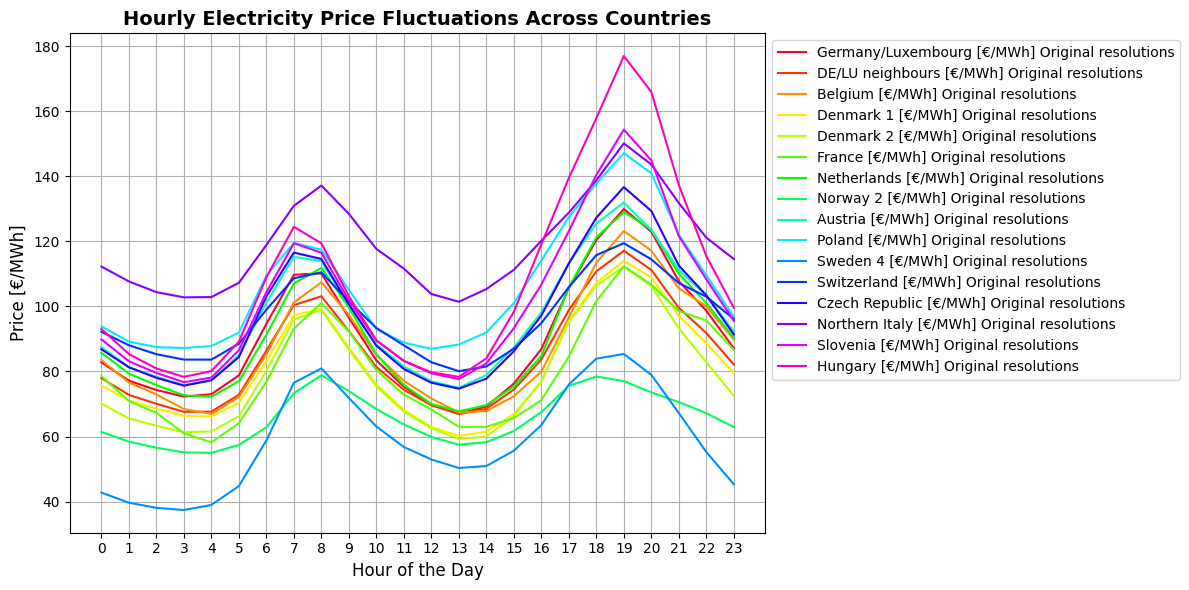

✅ Saved: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA\Hourly_Price_Fluctuations.png


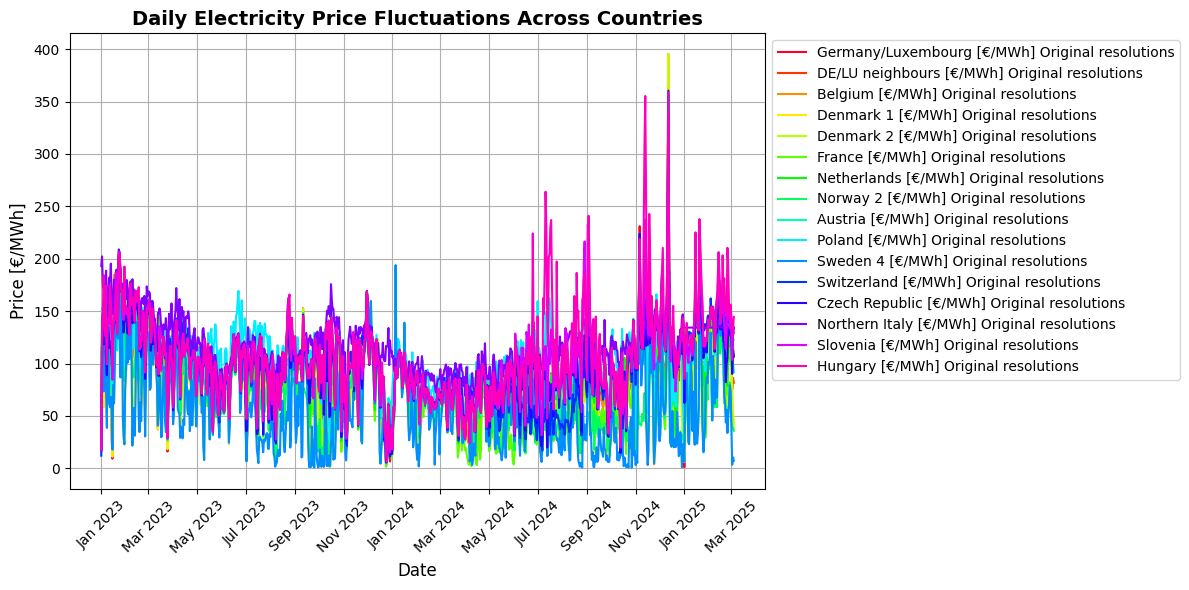

✅ Saved: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA\Daily_Price_Fluctuations.png


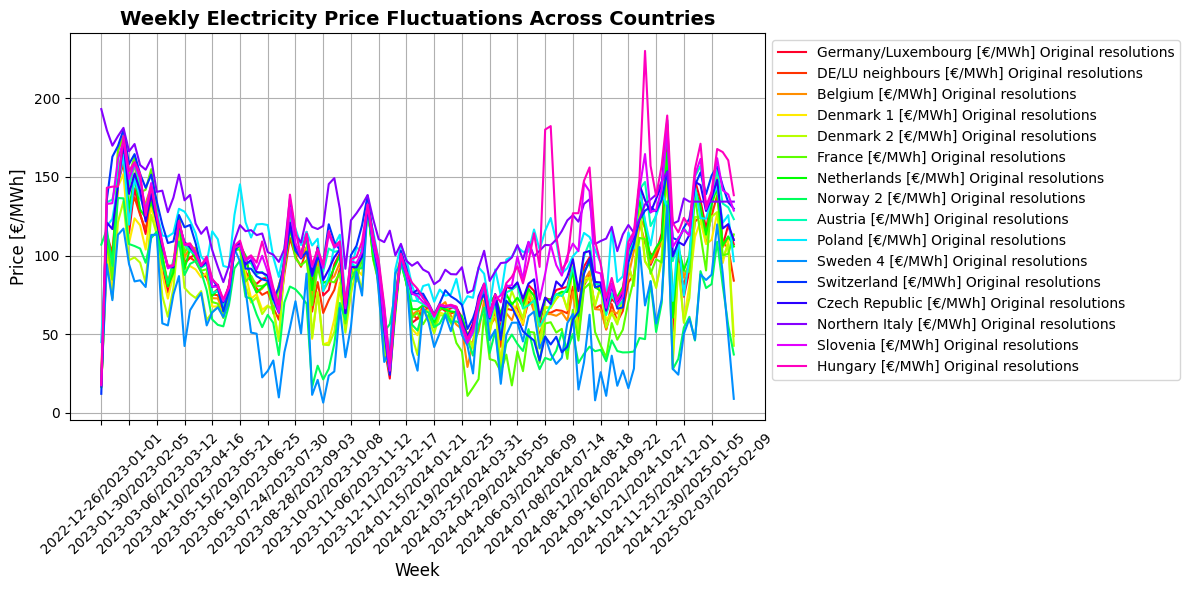

✅ Saved: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA\Weekly_Price_Fluctuations.png

🚀 **Price fluctuation analysis completed successfully!**


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import numpy as np

file_path = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Day-ahead_prices_202301010000_202503050000_Hour.csv"
output_dir = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA"
os.makedirs(output_dir, exist_ok=True)

df = pd.read_csv(file_path, encoding='windows-1252')

df['Start date'] = pd.to_datetime(df['Start date'], format='mixed', errors='coerce')
df['End date'] = pd.to_datetime(df['End date'], format='mixed', errors='coerce')

df = df.dropna(subset=['Start date', 'End date'])

df['Hour'] = df['Start date'].dt.hour
df['Day'] = df['Start date'].dt.date
df['Week'] = df['Start date'].dt.to_period('W').astype(str)

price_columns = [col for col in df.columns if '[€/MWh]' in col]

colors = plt.cm.get_cmap('gist_rainbow', len(price_columns))  

fig, ax = plt.subplots(figsize=(12, 6))

for i, country in enumerate(price_columns):
    hourly_avg = df.groupby('Hour')[country].mean()
    ax.plot(hourly_avg.index, hourly_avg, label=country, color=colors(i))

ax.set_title('Hourly Electricity Price Fluctuations Across Countries', fontsize=14, fontweight='bold')
ax.set_xlabel('Hour of the Day', fontsize=12)
ax.set_ylabel('Price [€/MWh]', fontsize=12)
plt.xticks(range(0, 24, 1))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.tight_layout()

plot_path = os.path.join(output_dir, "Hourly_Price_Fluctuations.png")
plt.savefig(plot_path, dpi=300)
plt.show()
print(f'✅ Saved: {plot_path}')

fig, ax = plt.subplots(figsize=(12, 6))

for i, country in enumerate(price_columns):
    daily_avg = df.groupby('Day')[country].mean()
    ax.plot(daily_avg.index, daily_avg, label=country, color=colors(i))

ax.set_title('Daily Electricity Price Fluctuations Across Countries', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price [€/MWh]', fontsize=12)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.tight_layout()

plot_path = os.path.join(output_dir, "Daily_Price_Fluctuations.png")
plt.savefig(plot_path, dpi=300)
plt.show()
print(f'✅ Saved: {plot_path}')

fig, ax = plt.subplots(figsize=(12, 6))

for i, country in enumerate(price_columns):
    weekly_avg = df.groupby('Week')[country].mean()
    ax.plot(weekly_avg.index, weekly_avg, label=country, color=colors(i))

ax.set_title('Weekly Electricity Price Fluctuations Across Countries', fontsize=14, fontweight='bold')
ax.set_xlabel('Week', fontsize=12)
ax.set_ylabel('Price [€/MWh]', fontsize=12)

ax.set_xticks(np.arange(0, len(df['Week'].unique()), step=5))  
ax.set_xticklabels(df['Week'].unique()[::5], rotation=45)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.tight_layout()

plot_path = os.path.join(output_dir, "Weekly_Price_Fluctuations.png")
plt.savefig(plot_path, dpi=300)
plt.show()
print(f'✅ Saved: {plot_path}')

print("\n🚀 **Price fluctuation analysis completed successfully!**")


# 2. How do electricity consumption patterns change in the same timeframes, and how does this impact pricing?


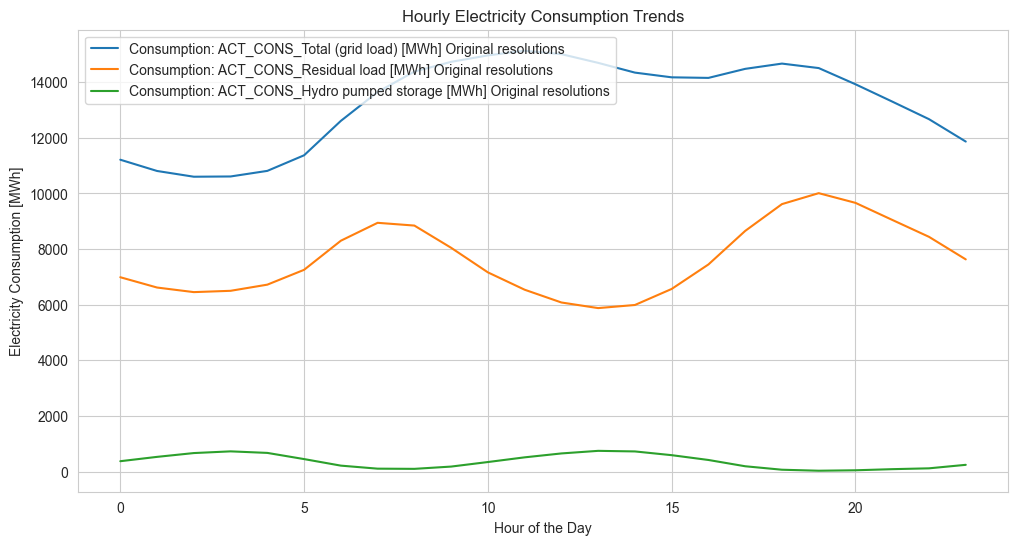

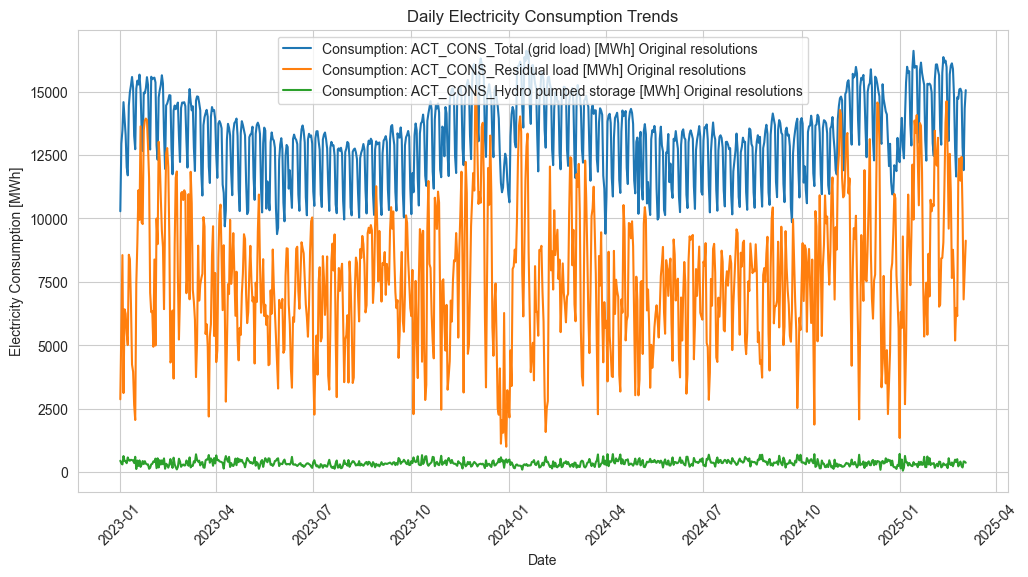

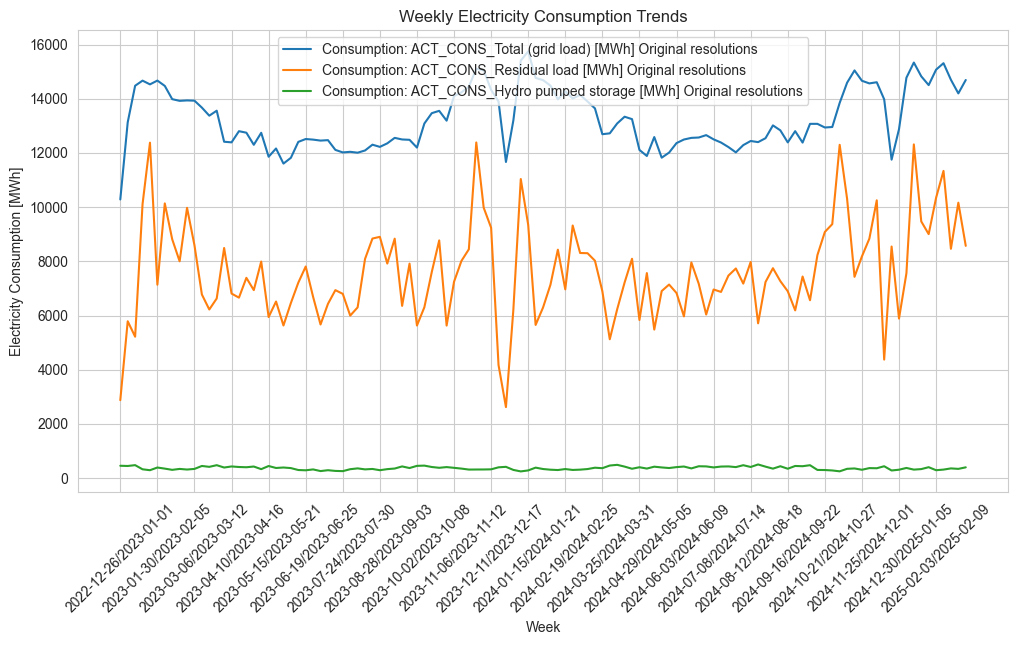

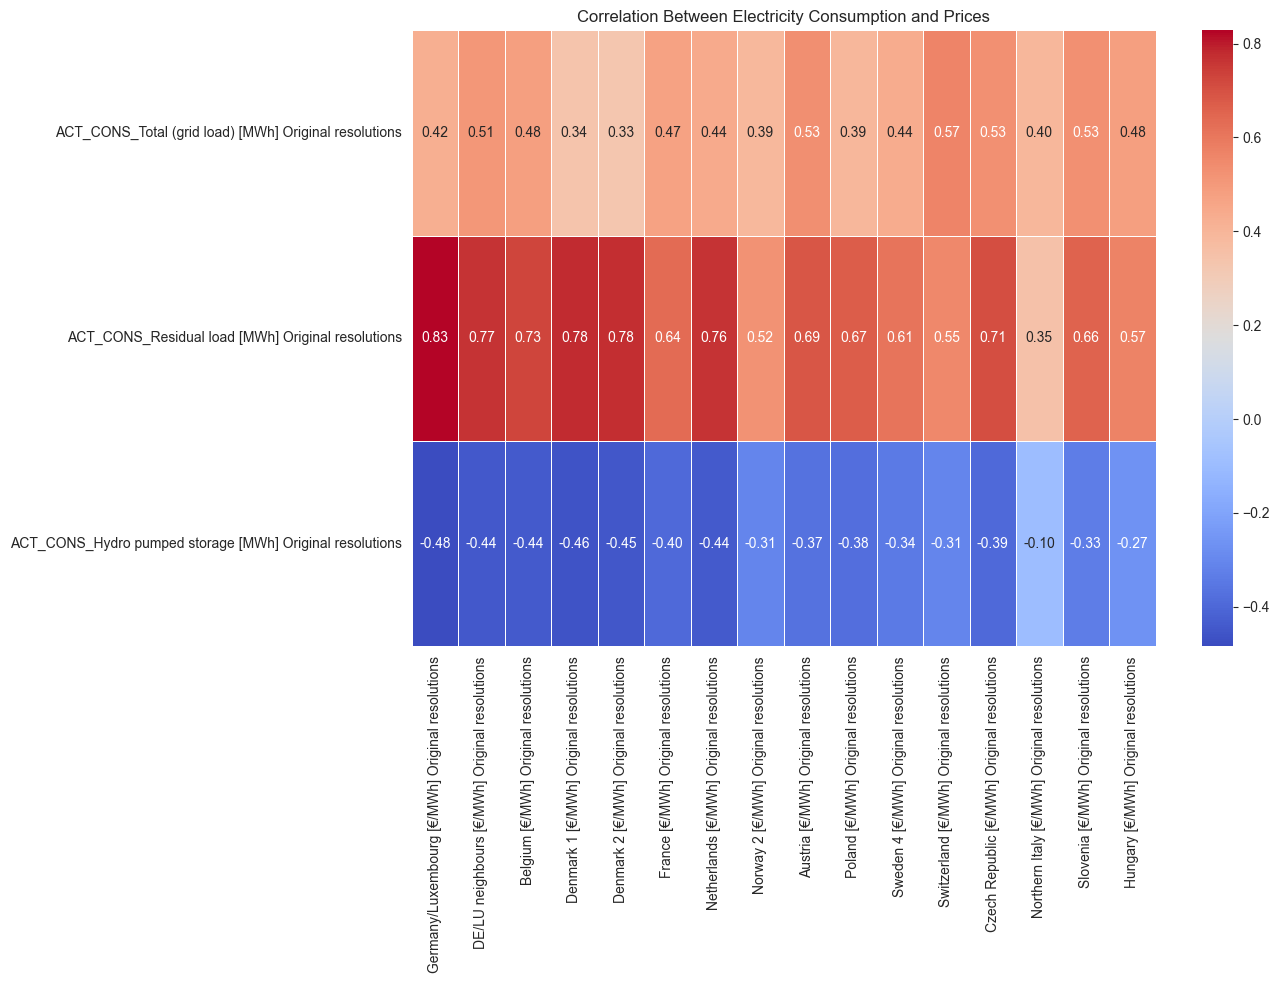

✅ Analysis Completed! All charts and insights have been generated.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

consumption_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Quarterhour.csv"
price_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Day-ahead_prices_202301010000_202503050000_Hour.csv"
output_dir = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA"
os.makedirs(output_dir, exist_ok=True)

df_cons = pd.read_csv(consumption_file, encoding='windows-1252')
df_price = pd.read_csv(price_file, encoding='windows-1252')

df_cons['Start date'] = pd.to_datetime(df_cons['Start date'])
df_price['Start date'] = pd.to_datetime(df_price['Start date'])

df_cons['Hour'] = df_cons['Start date'].dt.hour
df_cons['Day'] = df_cons['Start date'].dt.date
df_cons['Week'] = df_cons['Start date'].dt.to_period('W')

df_price['Hour'] = df_price['Start date'].dt.hour
df_price['Day'] = df_price['Start date'].dt.date
df_price['Week'] = df_price['Start date'].dt.to_period('W')

consumption_columns = [
    'ACT_CONS_Total (grid load) [MWh] Original resolutions',
    'ACT_CONS_Residual load [MWh] Original resolutions',
    'ACT_CONS_Hydro pumped storage [MWh] Original resolutions'
]

price_columns = [col for col in df_price.columns if '[€/MWh]' in col]

df_hourly_cons = df_cons.groupby("Hour")[consumption_columns].mean()
df_hourly_price = df_price.groupby("Hour")[price_columns].mean()

df_daily_cons = df_cons.groupby("Day")[consumption_columns].mean()
df_daily_price = df_price.groupby("Day")[price_columns].mean()

df_weekly_cons = df_cons.groupby("Week")[consumption_columns].mean()
df_weekly_price = df_price.groupby("Week")[price_columns].mean()

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
for col in consumption_columns:
    plt.plot(df_hourly_cons.index, df_hourly_cons[col], label=f"Consumption: {col}")

plt.xlabel("Hour of the Day")
plt.ylabel("Electricity Consumption [MWh]")
plt.title("Hourly Electricity Consumption Trends")
plt.legend()
plt.savefig(os.path.join(output_dir, "Hourly_Consumption_Trends.png"))
plt.show()

plt.figure(figsize=(12, 6))
for col in consumption_columns:
    plt.plot(df_daily_cons.index, df_daily_cons[col], label=f"Consumption: {col}")

plt.xlabel("Date")
plt.ylabel("Electricity Consumption [MWh]")
plt.title("Daily Electricity Consumption Trends")
plt.legend()
plt.xticks(rotation=45)
plt.savefig(os.path.join(output_dir, "Daily_Consumption_Trends.png"))
plt.show()

plt.figure(figsize=(12, 6))
for col in consumption_columns:
    plt.plot(df_weekly_cons.index.astype(str), df_weekly_cons[col], label=f"Consumption: {col}")

plt.xlabel("Week")
plt.ylabel("Electricity Consumption [MWh]")
plt.title("Weekly Electricity Consumption Trends")
plt.legend()

plt.xticks(df_weekly_cons.index[::5].astype(str), rotation=45)

plt.savefig(os.path.join(output_dir, "Weekly_Consumption_Trends_Fixed.png"))
plt.show()


df_correlation = df_daily_cons.merge(df_daily_price, left_index=True, right_index=True)
correlation_matrix = df_correlation.corr()
filtered_corr = correlation_matrix.loc[consumption_columns, price_columns]
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Electricity Consumption and Prices")
plt.savefig(os.path.join(output_dir, "Consumption_Price_Correlation.png"))
plt.show()

print("✅ Analysis Completed! All charts and insights have been generated.")


# 3. How does electricity generation (actual vs. forecast) align with price trends?


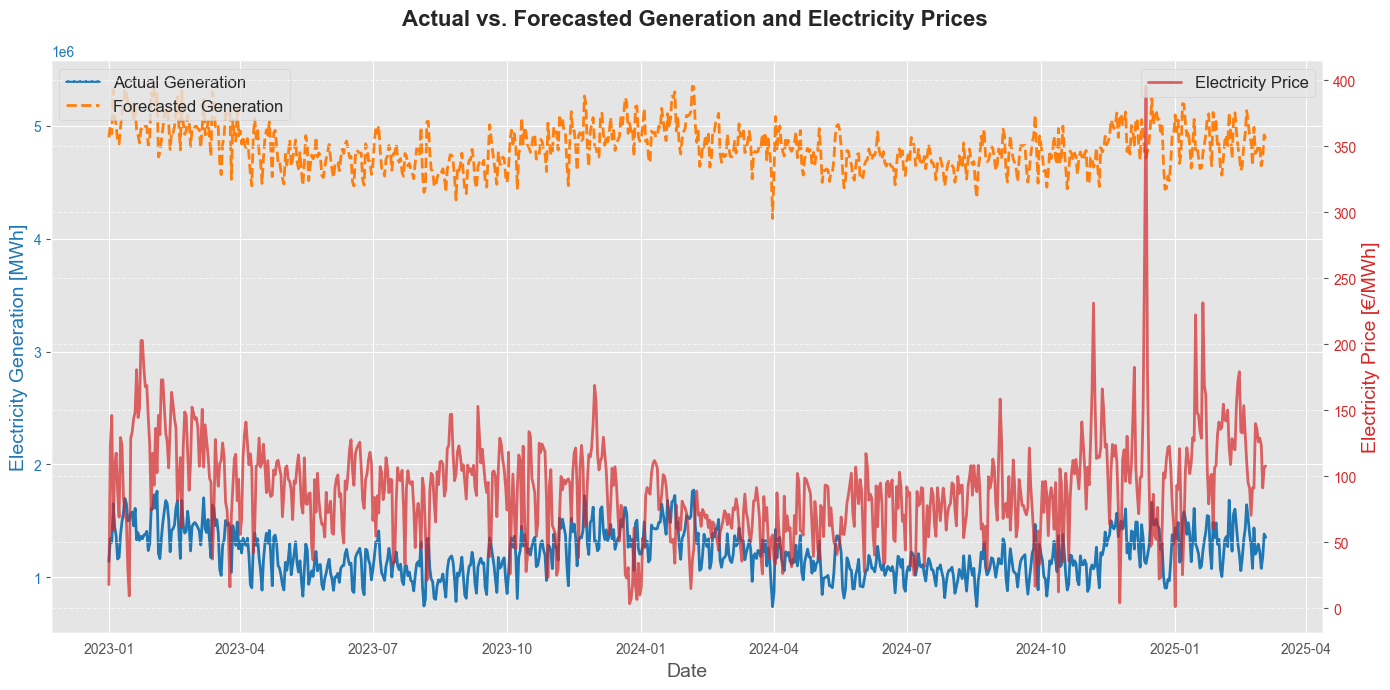

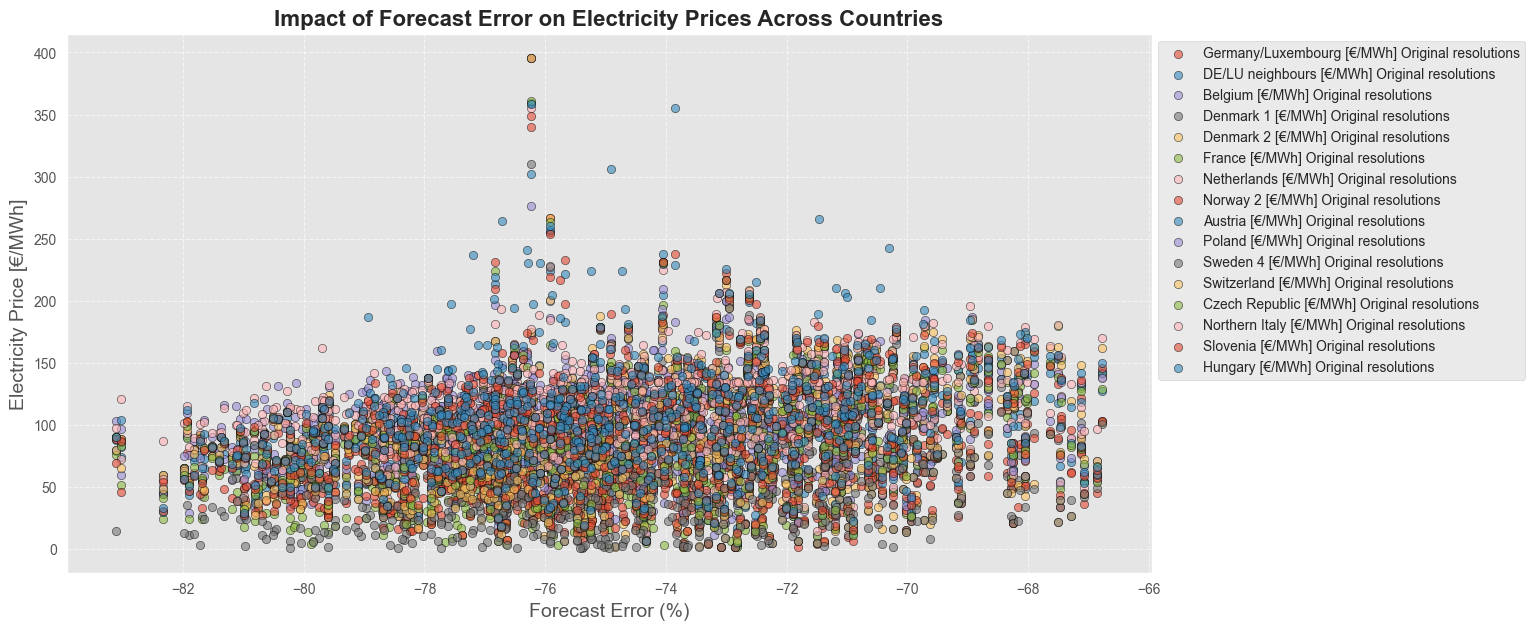

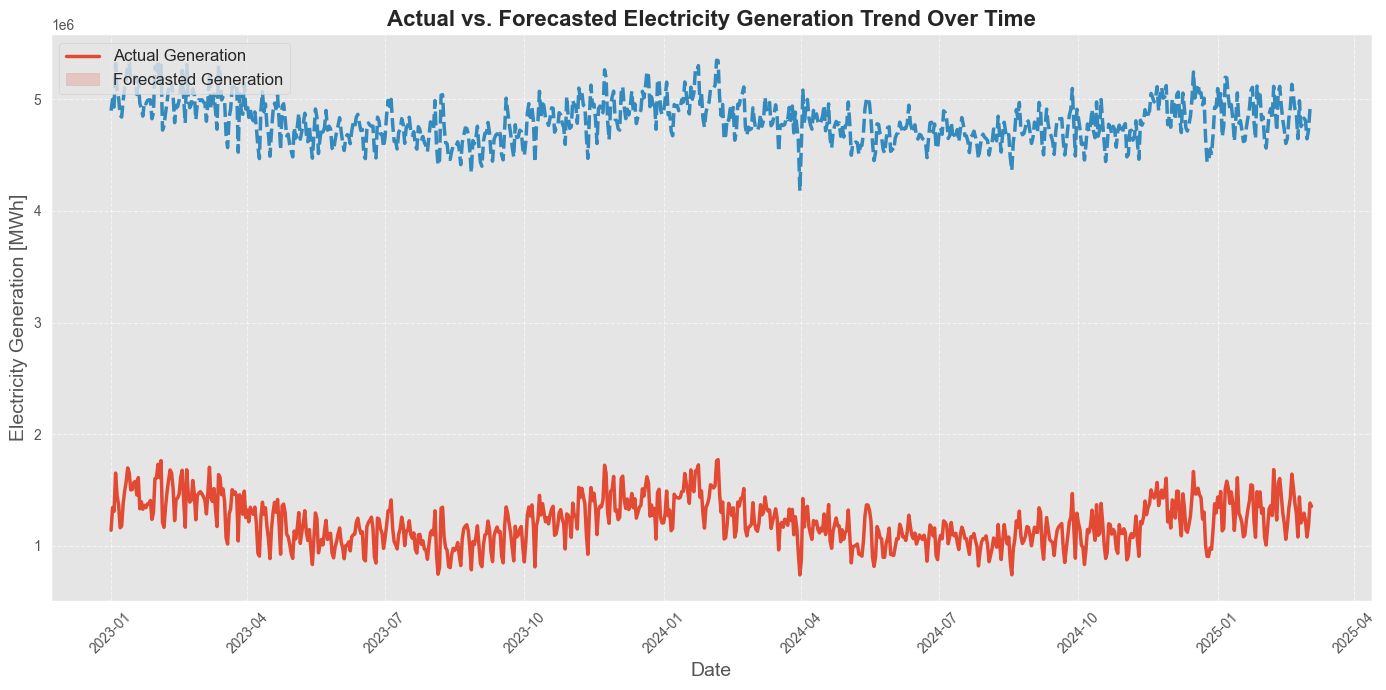

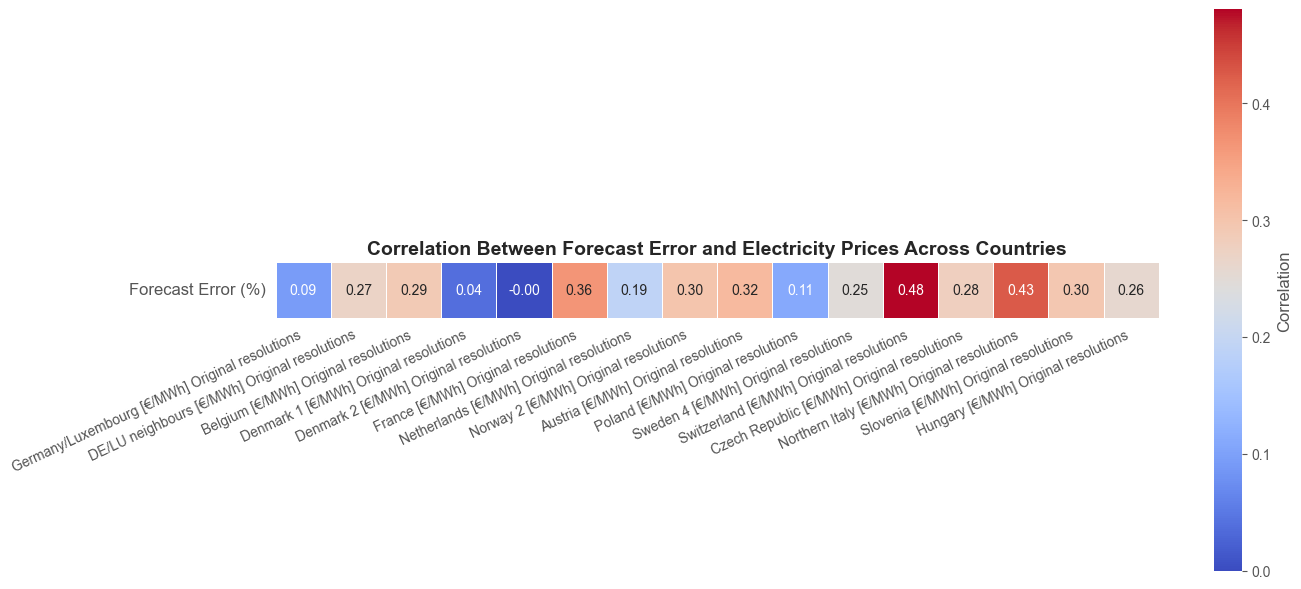

✅ Analysis Completed! All professional plots have been saved.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

gen_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Quarterhour.csv"
price_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Day-ahead_prices_202301010000_202503050000_Hour.csv"
output_dir = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA"
os.makedirs(output_dir, exist_ok=True)

df_gen = pd.read_csv(gen_file, encoding='windows-1252')
df_price = pd.read_csv(price_file, encoding='windows-1252')

df_gen['Start date'] = pd.to_datetime(df_gen['Start date'], errors='coerce')
df_price['Start date'] = pd.to_datetime(df_price['Start date'], errors='coerce')

df_gen['Day'] = df_gen['Start date'].dt.date
df_price['Day'] = df_price['Start date'].dt.date

actual_gen_cols = [
    'ACT_GEN_Biomass [MWh] Original resolutions',
    'ACT_GEN_Hydropower [MWh] Original resolutions',
    'ACT_GEN_Wind offshore [MWh] Original resolutions',
    'ACT_GEN_Wind onshore [MWh] Original resolutions',
    'ACT_GEN_Photovoltaics [MWh] Original resolutions',
    'ACT_GEN_Other renewable [MWh] Original resolutions',
    'ACT_GEN_Nuclear [MWh] Original resolutions',
    'ACT_GEN_Lignite [MWh] Original resolutions',
    'ACT_GEN_Hard coal [MWh] Original resolutions',
    'ACT_GEN_Fossil gas [MWh] Original resolutions',
    'ACT_GEN_Hydro pumped storage [MWh] Original resolutions',
    'ACT_GEN_Other conventional [MWh] Original resolutions'
]

forecast_gen_cols = ['FCST_GEN_DA_Total [MWh] Original resolutions']

df_daily_gen = df_gen.groupby("Day")[actual_gen_cols + forecast_gen_cols].sum()

df_daily_gen["Total Actual Generation"] = df_daily_gen[actual_gen_cols].sum(axis=1)
df_daily_gen["Total Forecasted Generation"] = df_daily_gen[forecast_gen_cols].sum(axis=1)

df_daily_gen["Forecast Error (%)"] = (
    (df_daily_gen["Total Actual Generation"] - df_daily_gen["Total Forecasted Generation"]) /
    df_daily_gen["Total Forecasted Generation"]
) * 100

df_price["Day"] = pd.to_datetime(df_price["Day"], errors="coerce").dt.date
df_daily_price = df_price.groupby("Day").mean(numeric_only=True)

df_analysis = df_daily_gen.merge(df_daily_price, left_index=True, right_index=True, how="inner")

sns.set_style("darkgrid")
plt.style.use("ggplot")  

fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(df_analysis.index, df_analysis['Total Actual Generation'], label="Actual Generation", color='#1f77b4', linewidth=2)
ax1.plot(df_analysis.index, df_analysis['Total Forecasted Generation'], label="Forecasted Generation", color='#ff7f0e', linestyle='dashed', linewidth=2)
ax1.set_xlabel("Date", fontsize=14)
ax1.set_ylabel("Electricity Generation [MWh]", fontsize=14, color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')

ax2 = ax1.twinx()
ax2.plot(df_analysis.index, df_analysis['Germany/Luxembourg [€/MWh] Original resolutions'], label="Electricity Price", color='#d62728', linewidth=2, alpha=0.7)
ax2.set_ylabel("Electricity Price [€/MWh]", fontsize=14, color='#d62728')
ax2.tick_params(axis='y', labelcolor='#d62728')

fig.suptitle("Actual vs. Forecasted Generation and Electricity Prices", fontsize=16, fontweight="bold")
ax1.legend(loc="upper left", fontsize=12)
ax2.legend(loc="upper right", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

plt.savefig(os.path.join(output_dir, "Actual_Forecast_vs_Price_Pro.png"), dpi=300)
plt.show()

fig, ax = plt.subplots(figsize=(14, 7))

for country in df_daily_price.columns:
    ax.scatter(df_analysis["Forecast Error (%)"], df_analysis[country], label=country, alpha=0.6, edgecolors='black')

ax.set_xlabel("Forecast Error (%)", fontsize=14)
ax.set_ylabel("Electricity Price [€/MWh]", fontsize=14)
ax.set_title("Impact of Forecast Error on Electricity Prices Across Countries", fontsize=16, fontweight="bold")
ax.legend(fontsize=10, loc="upper left", bbox_to_anchor=(1, 1), frameon=True)
ax.grid(True, linestyle="--", alpha=0.6)

plt.savefig(os.path.join(output_dir, "Forecast_Error_vs_Price_All_Countries_Pro.png"), dpi=300)
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_analysis[['Total Actual Generation', 'Total Forecasted Generation']], linewidth=2.5)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Electricity Generation [MWh]", fontsize=14)
plt.title("Actual vs. Forecasted Electricity Generation Trend Over Time", fontsize=16, fontweight="bold")
plt.legend(labels=["Actual Generation", "Forecasted Generation"], fontsize=12, loc="upper left", frameon=True)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

plt.savefig(os.path.join(output_dir, "Actual_Forecast_Trend_Over_Time.png"), dpi=300)
plt.show()

plt.figure(figsize=(14, 6))  
correlation_matrix = df_analysis.corr()
filtered_corr = correlation_matrix.loc[["Forecast Error (%)"], df_daily_price.columns]

sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, 
            cbar_kws={'label': 'Correlation'}, square=True)

plt.xticks(fontsize=10, rotation=25, ha="right") 
plt.yticks(fontsize=12, rotation=0)  
plt.title("Correlation Between Forecast Error and Electricity Prices Across Countries", 
          fontsize=14, fontweight="bold")

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Forecast_Error_Correlation_All_Countries.png"), dpi=300)
plt.show()


print("✅ Analysis Completed! All professional plots have been saved.")


#4.  What patterns emerge from scheduled commercial exchanges and cross-border physical flows?


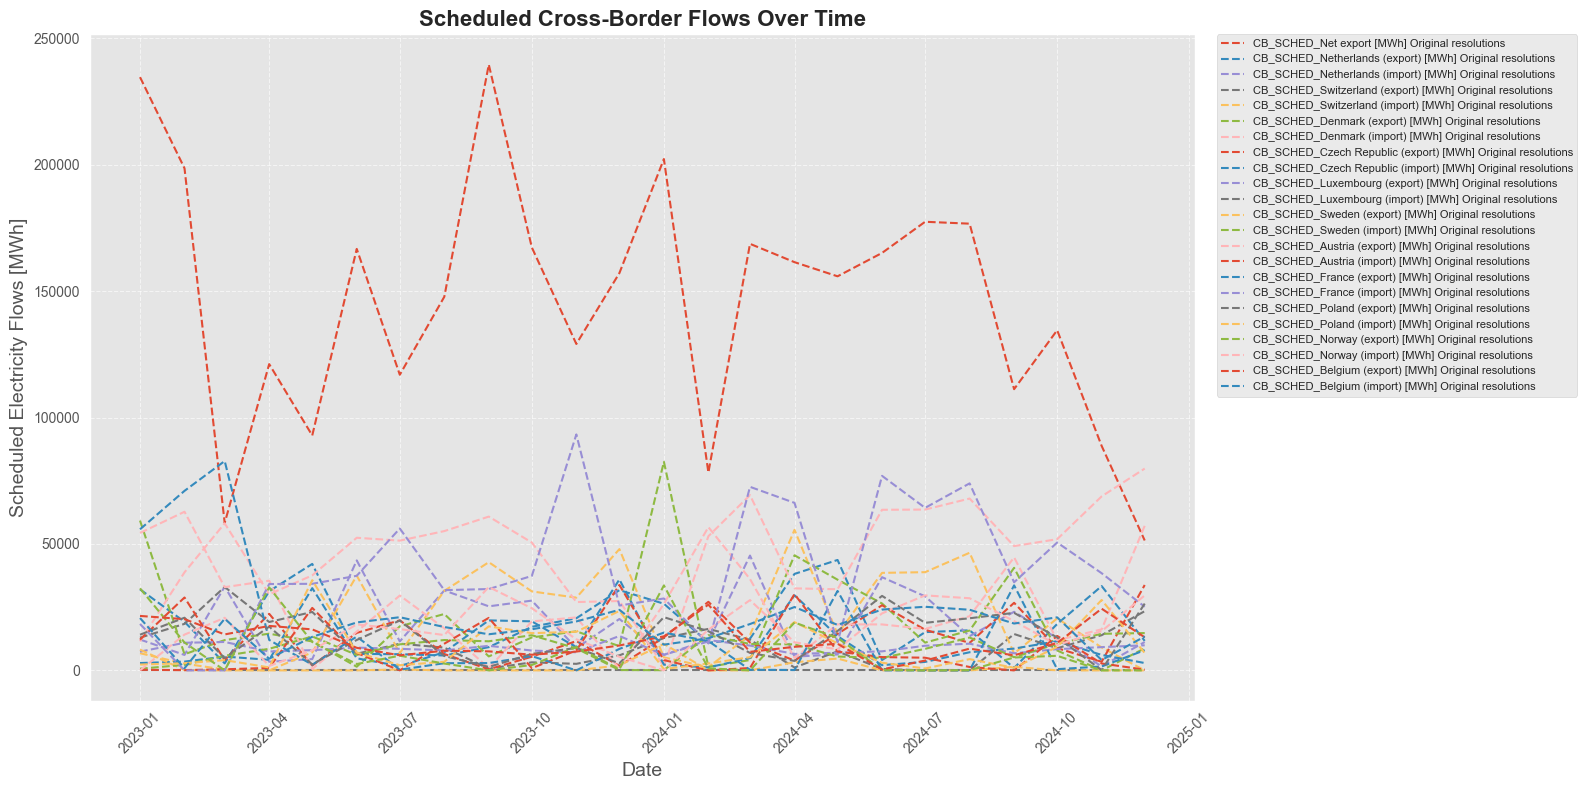

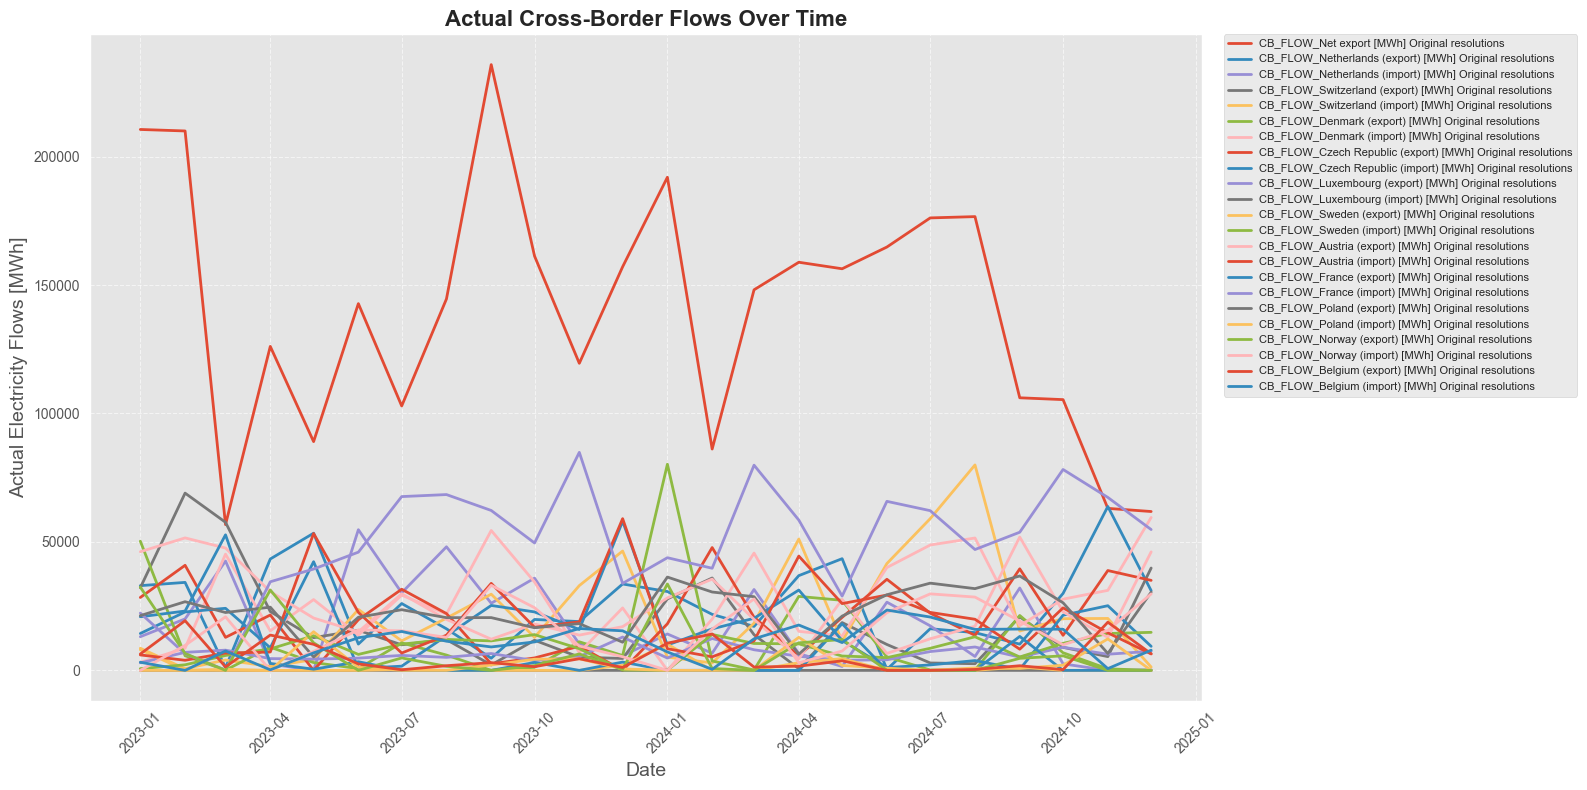

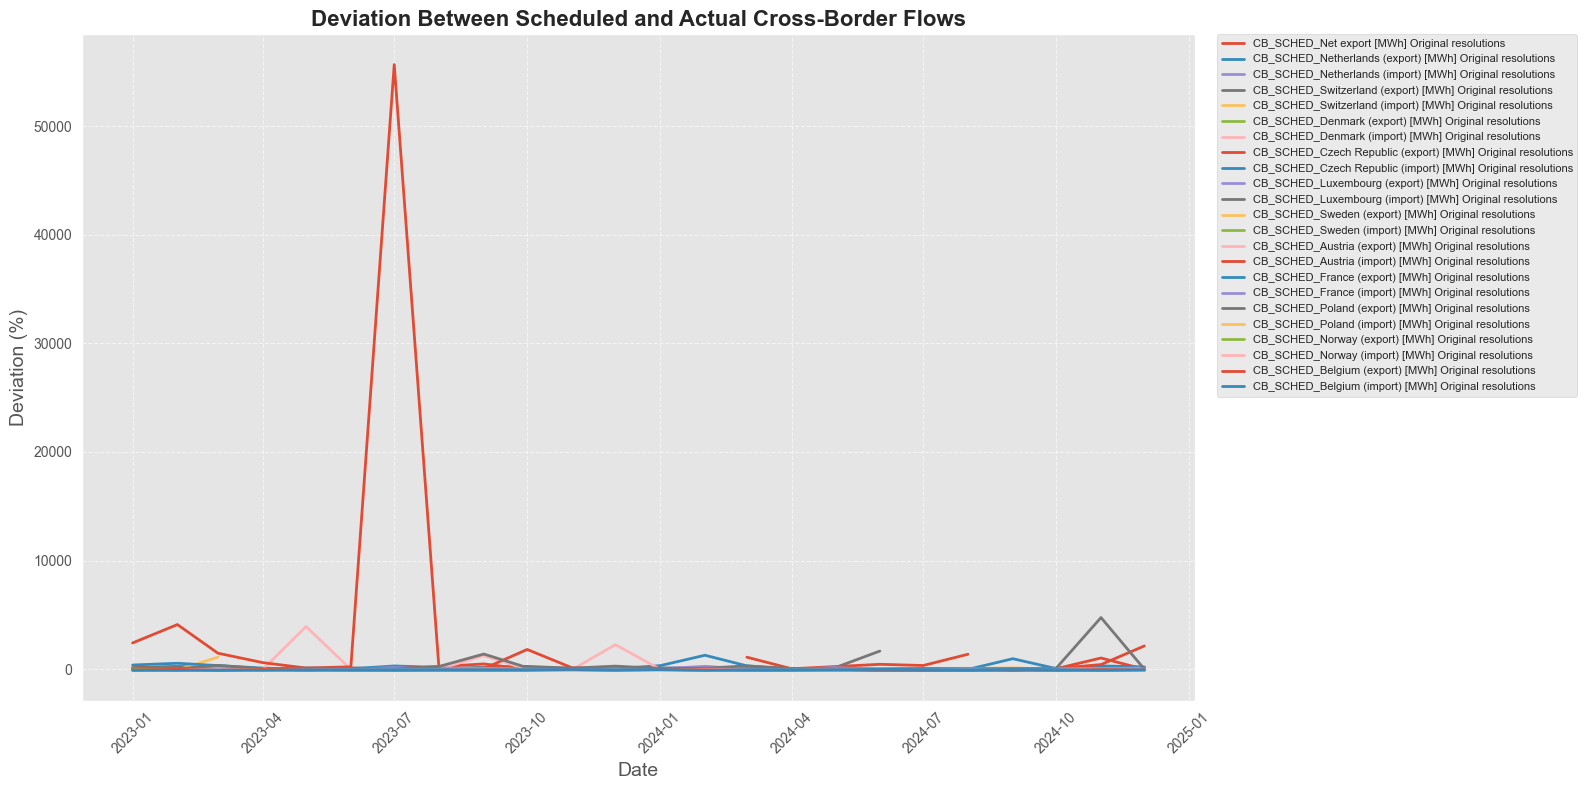

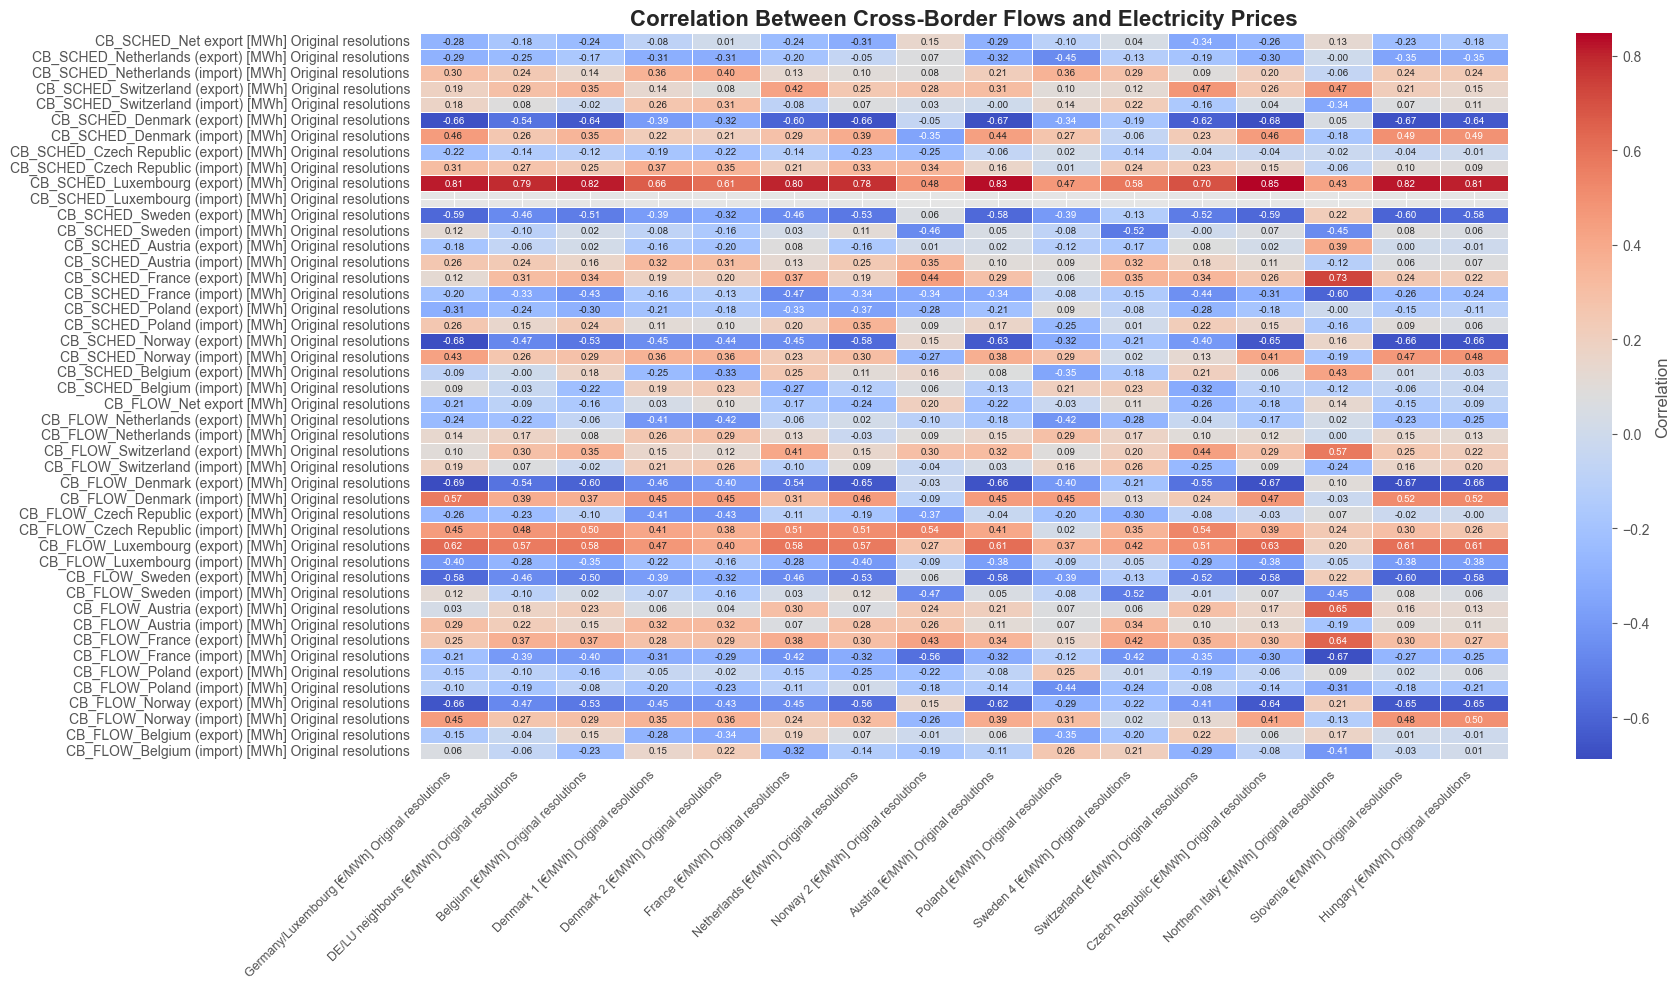

✅ Analysis Completed! All professional plots have been saved.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

cross_border_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Quarterhour.csv"
price_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Day-ahead_prices_202301010000_202503050000_Hour.csv"
tso_costs_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Costs_of_TSOs__without_costs_of_DSOs__202301010000_202503050000_Month.csv"

output_dir = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA"
os.makedirs(output_dir, exist_ok=True)

df_flows = pd.read_csv(cross_border_file, encoding='windows-1252', low_memory=False)
df_price = pd.read_csv(price_file, encoding='windows-1252', low_memory=False)
df_tso = pd.read_csv(tso_costs_file, encoding='windows-1252', low_memory=False)

df_flows['Start date'] = pd.to_datetime(df_flows['Start date'], errors='coerce')
df_price['Start date'] = pd.to_datetime(df_price['Start date'], errors='coerce')
df_tso['Start date'] = pd.to_datetime(df_tso['Start date'], errors='coerce')

df_flows['Day'] = df_flows['Start date'].dt.date
df_price['Day'] = df_price['Start date'].dt.date
df_tso['Day'] = df_tso['Start date'].dt.date

scheduled_cols = [col for col in df_flows.columns if "CB_SCHED_" in col]
actual_cols = [col for col in df_flows.columns if "CB_FLOW_" in col]

df_daily_flows = df_flows.groupby("Day")[scheduled_cols + actual_cols].sum()

for country in scheduled_cols:
    actual_col = country.replace("CB_SCHED_", "CB_FLOW_")
    if actual_col in actual_cols:
        df_daily_flows[f"Deviation_{country} (%)"] = (
            (df_daily_flows[actual_col] - df_daily_flows[country]) / df_daily_flows[country]
        ) * 100

df_price['Day'] = pd.to_datetime(df_price["Day"], errors="coerce").dt.date
df_tso['Day'] = pd.to_datetime(df_tso["Day"], errors="coerce").dt.date

df_daily_price = df_price.groupby("Day").mean(numeric_only=True)
df_daily_tso = df_tso.groupby("Day").mean(numeric_only=True)

df_analysis = df_daily_flows.merge(df_daily_price, left_index=True, right_index=True, how="inner")
df_analysis = df_analysis.merge(df_daily_tso, left_index=True, right_index=True, how="inner")

sns.set_style("darkgrid")
plt.style.use("ggplot")

plt.figure(figsize=(16, 8))
for country in scheduled_cols:  
    plt.plot(df_analysis.index, df_analysis[country], label=country, linestyle="dashed")

plt.xlabel("Date", fontsize=14)
plt.ylabel("Scheduled Electricity Flows [MWh]", fontsize=14)
plt.title("Scheduled Cross-Border Flows Over Time", fontsize=16, fontweight="bold")
plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)  
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Scheduled_Flows_Trend.png"), dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(16, 8))
for country in actual_cols:  
    plt.plot(df_analysis.index, df_analysis[country], label=country, linewidth=2)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Actual Electricity Flows [MWh]", fontsize=14)
plt.title("Actual Cross-Border Flows Over Time", fontsize=16, fontweight="bold")
plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)  # Move legend outside
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Actual_Flows_Trend.png"), dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(16, 8))
for country in scheduled_cols:  
    deviation_col = f"Deviation_{country} (%)"
    plt.plot(df_analysis.index, df_analysis[deviation_col], label=country, linewidth=2)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Deviation (%)", fontsize=14)
plt.title("Deviation Between Scheduled and Actual Cross-Border Flows", fontsize=16, fontweight="bold")
plt.legend(fontsize=8, loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)  # Move legend outside
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Deviation_Scheduled_vs_Actual.png"), dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(18, 10))
correlation_matrix = df_analysis.corr()
filtered_corr = correlation_matrix.loc[scheduled_cols + actual_cols, df_daily_price.columns]

sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 7}, cbar_kws={'label': 'Correlation'})
plt.title("Correlation Between Cross-Border Flows and Electricity Prices", fontsize=16, fontweight="bold")
plt.xticks(fontsize=9, rotation=45, ha="right")
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Cross_Border_Flows_vs_Prices_Correlation.png"), dpi=300, bbox_inches="tight")
plt.show()

print("✅ Analysis Completed! All professional plots have been saved.")


# 5.  What features have the strongest correlation with electricity prices?


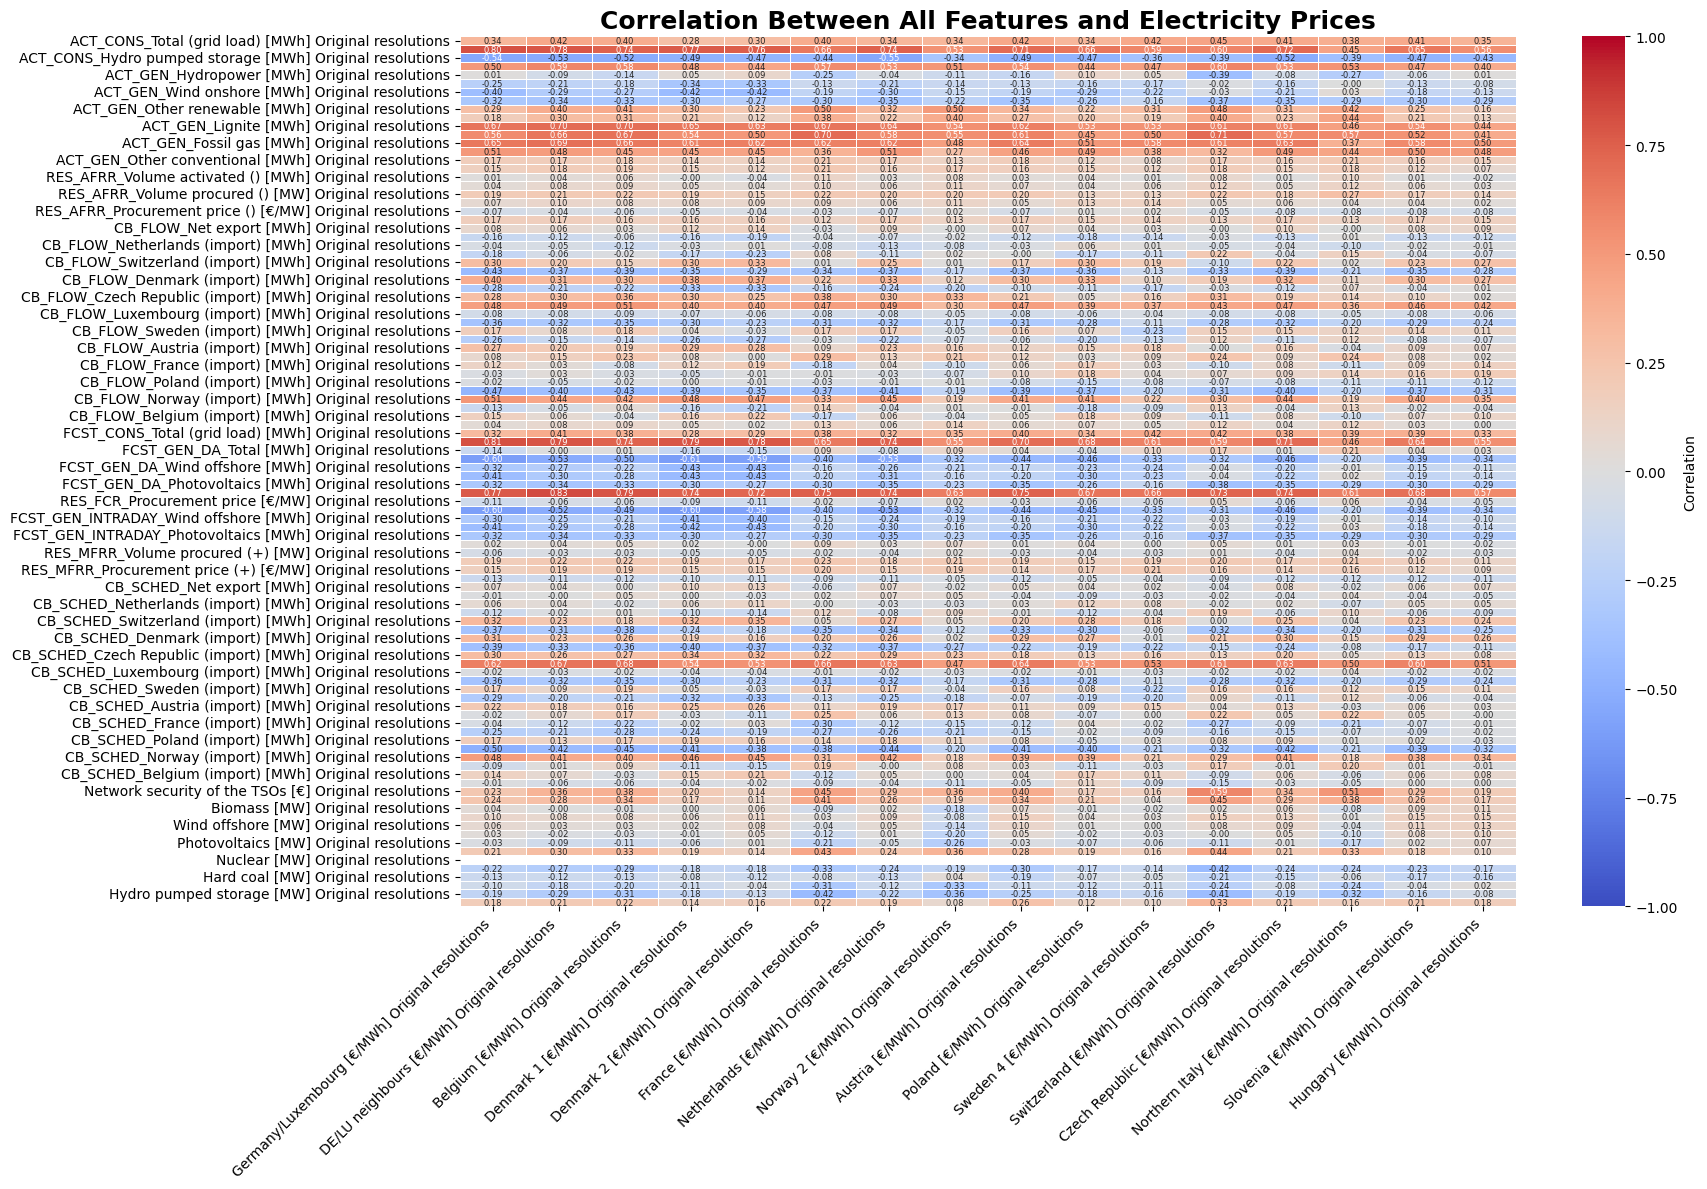

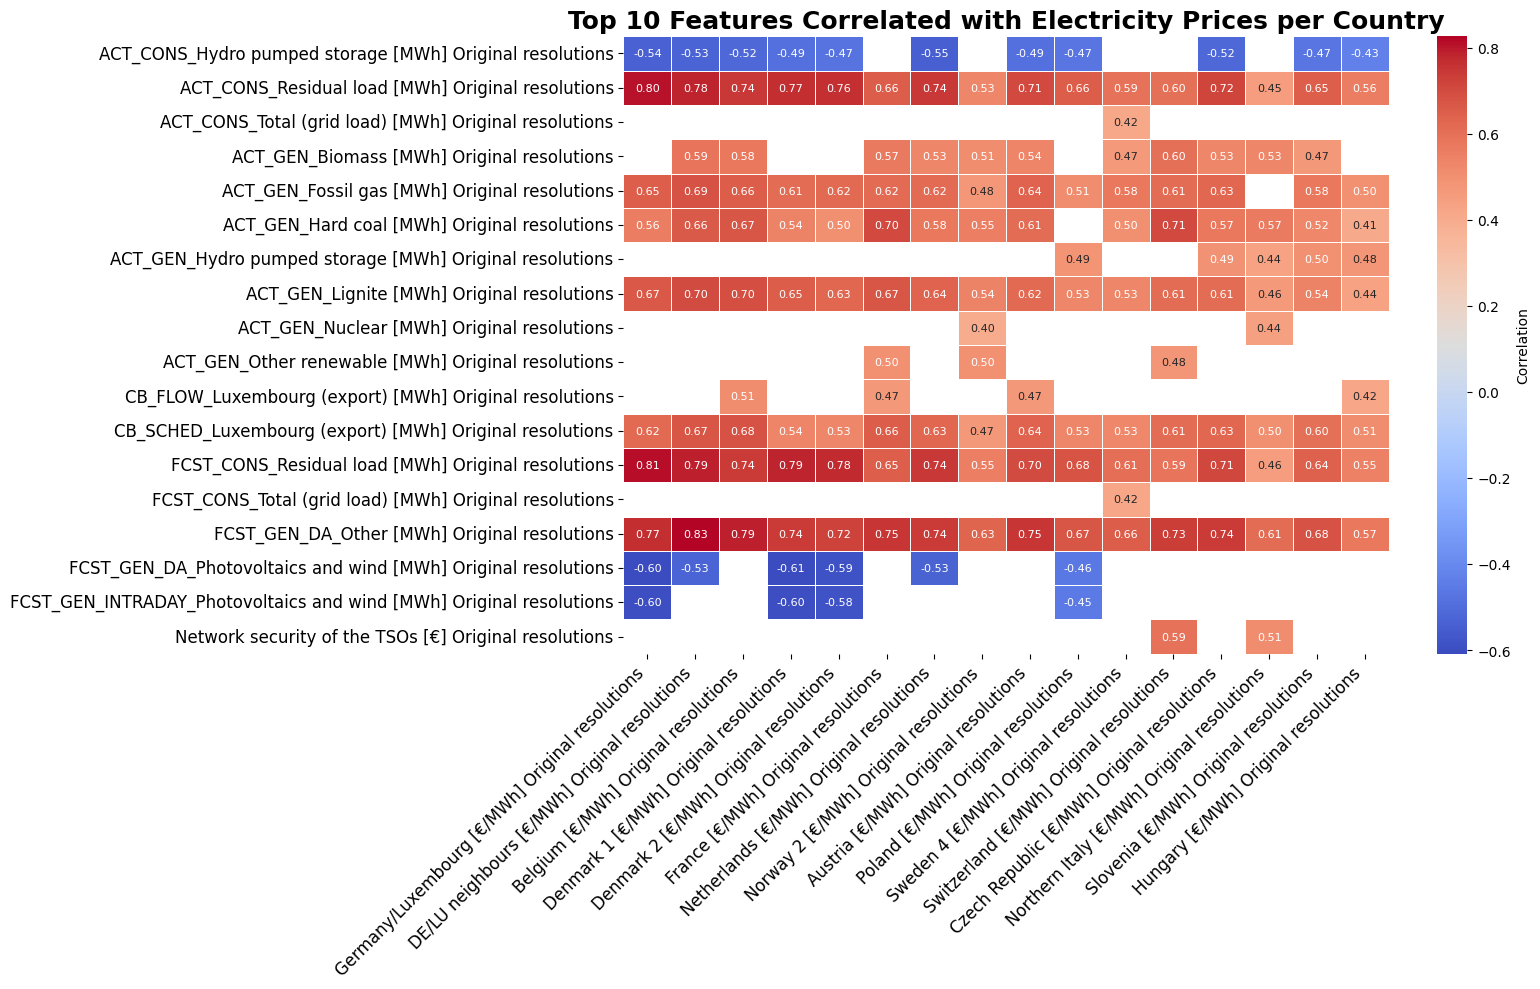

Analysis Completed! Two correlation heatmaps and CSV files have been saved.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

cross_border_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Quarterhour.csv"
price_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Day-ahead_prices_202301010000_202503050000_Hour.csv"
tso_costs_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Costs_of_TSOs__without_costs_of_DSOs__202301010000_202503050000_Month.csv"
generation_capacity_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Installed_generation_capacity_202301010000_202503050000_Year.csv"

output_dir = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA"
os.makedirs(output_dir, exist_ok=True)

df_flows = pd.read_csv(cross_border_file, encoding='windows-1252', low_memory=False)
df_price = pd.read_csv(price_file, encoding='windows-1252', low_memory=False)
df_tso = pd.read_csv(tso_costs_file, encoding='windows-1252', low_memory=False)
df_generation = pd.read_csv(generation_capacity_file, encoding='windows-1252', low_memory=False)

df_flows['Start date'] = pd.to_datetime(df_flows['Start date'], errors='coerce')
df_price['Start date'] = pd.to_datetime(df_price['Start date'], errors='coerce')
df_tso['Start date'] = pd.to_datetime(df_tso['Start date'], errors='coerce')
df_generation['Start date'] = pd.to_datetime(df_generation['Start date'], errors='coerce')

df_flows['Hour'] = df_flows['Start date'].dt.floor('h')
df_price['Hour'] = df_price['Start date'].dt.floor('h')
df_tso['Month'] = df_tso['Start date'].dt.to_period('M')  
df_generation['Year'] = df_generation['Start date'].dt.to_period('Y')  

df_hourly_flows = df_flows.groupby("Hour").mean(numeric_only=True)

df_monthly_tso = df_tso.groupby("Month").mean(numeric_only=True)

df_annual_generation = df_generation.groupby("Year").mean(numeric_only=True)

df_analysis = df_price.merge(df_hourly_flows, on="Hour", how="inner")

df_analysis['Month'] = df_analysis['Hour'].dt.to_period('M')
df_analysis = df_analysis.merge(df_monthly_tso, on="Month", how="left").drop(columns=["Month"])

df_analysis['Year'] = df_analysis['Hour'].dt.to_period('Y')
df_analysis = df_analysis.merge(df_annual_generation, on="Year", how="left").drop(columns=["Year"])

numeric_cols = df_analysis.select_dtypes(include=['number']).columns
df_analysis_numeric = df_analysis[numeric_cols]

correlation_matrix = df_analysis_numeric.corr()

price_cols = [col for col in df_price.columns if "€/MWh" in col]
correlation_with_prices = correlation_matrix[price_cols].drop(price_cols, errors='ignore')

correlation_with_prices.to_csv(os.path.join(output_dir, "Feature_Correlation_with_Electricity_Prices_ALL.csv"))

plt.figure(figsize=(18, 12))
sns.heatmap(
    correlation_with_prices, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.5, 
    cbar_kws={'label': 'Correlation'},
    annot_kws={"size": 6},
    vmin=-1, vmax=1
)
plt.title("Correlation Between All Features and Electricity Prices", fontsize=18, fontweight="bold")
plt.xticks(fontsize=10, rotation=45, ha="right")
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "All_Feature_Correlation_with_Electricity_Prices.png"), dpi=300)
plt.show()

top_features_per_country = {}
for country in price_cols:
    top_features = correlation_with_prices[country].abs().nlargest(10).index
    top_features_per_country[country] = correlation_with_prices.loc[top_features, country]

df_top_features = pd.DataFrame(top_features_per_country)

df_top_features.to_csv(os.path.join(output_dir, "Top_Feature_Correlation_with_Electricity_Prices.csv"))

plt.figure(figsize=(16, 10))
sns.heatmap(
    df_top_features, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.5, 
    cbar_kws={'label': 'Correlation'},
    annot_kws={"size": 8}
)

plt.title("Top 10 Features Correlated with Electricity Prices per Country", fontsize=18, fontweight="bold")
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Top_Feature_Correlation_with_Electricity_Prices.png"), dpi=300)
plt.show()

print("Analysis Completed! Two correlation heatmaps and CSV files have been saved.")


# 6. How do electricity prices correlate between different countries?


✅ Correlation matrix saved to: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA\Electricity_Price_Correlation_Between_Countries.csv


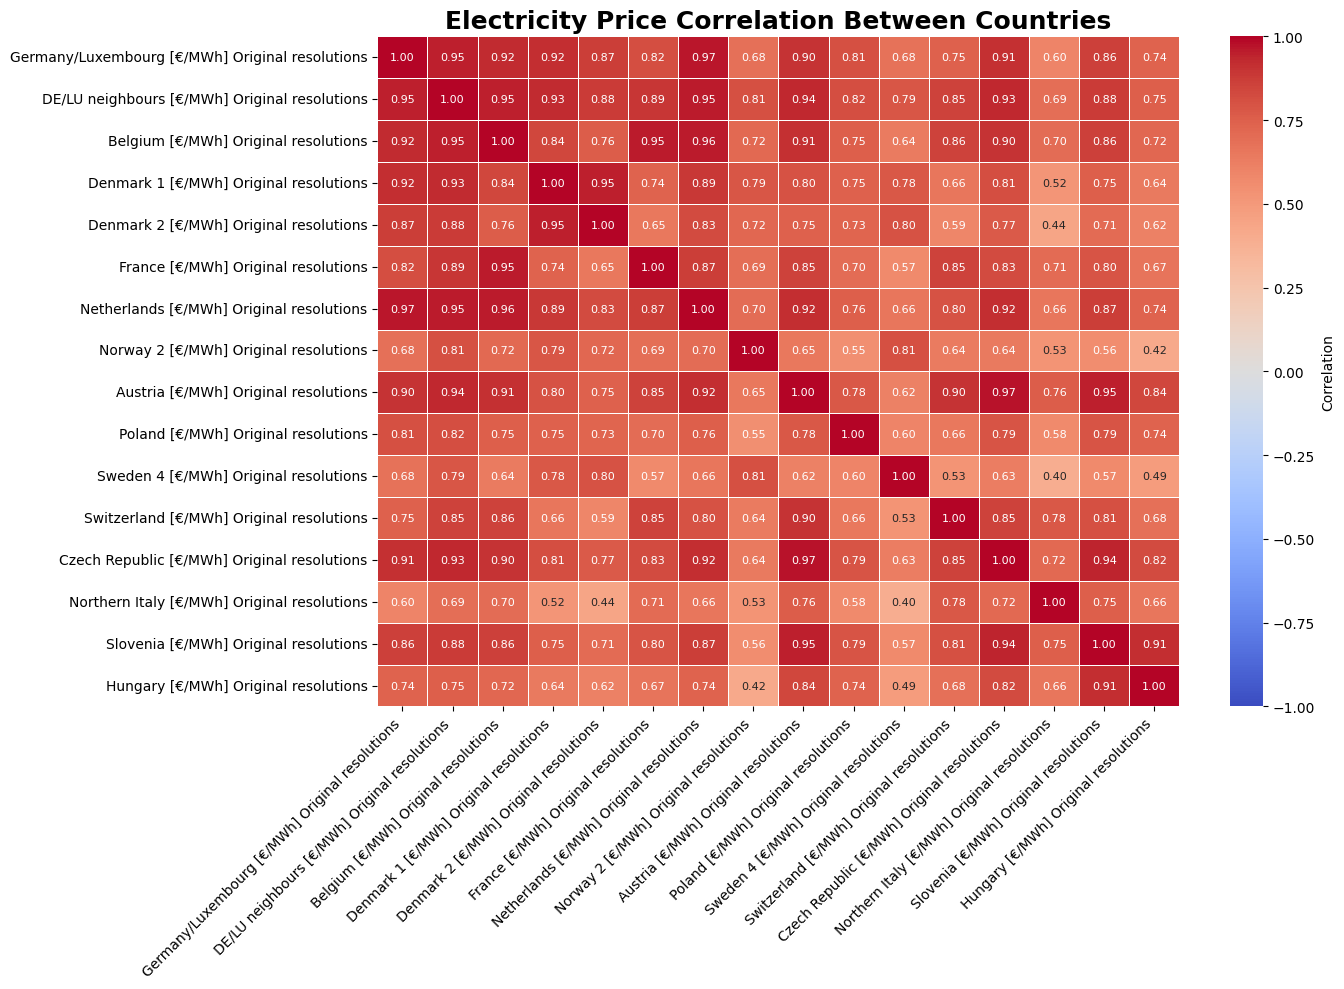

✅ Heatmap saved to: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA\Electricity_Price_Correlation_Between_Countries.png


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

price_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Day-ahead_prices_202301010000_202503050000_Hour.csv"

output_dir = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA"
os.makedirs(output_dir, exist_ok=True)

df_price = pd.read_csv(price_file, encoding='windows-1252', low_memory=False)

df_price['Start date'] = pd.to_datetime(df_price['Start date'], errors='coerce')

price_cols = [col for col in df_price.columns if "€/MWh" in col]
df_price_selected = df_price[['Start date'] + price_cols]

df_price_selected['Day'] = df_price_selected['Start date'].dt.date  
df_daily_prices = df_price_selected.groupby("Day").mean(numeric_only=True)  
correlation_matrix = df_daily_prices.corr()

correlation_csv_path = os.path.join(output_dir, "Electricity_Price_Correlation_Between_Countries.csv")
correlation_matrix.to_csv(correlation_csv_path)
print(f"✅ Correlation matrix saved to: {correlation_csv_path}")

plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    linewidths=0.5, 
    cbar_kws={'label': 'Correlation'},
    annot_kws={"size": 8}, 
    vmin=-1, vmax=1
)

plt.title("Electricity Price Correlation Between Countries", fontsize=18, fontweight="bold")
plt.xticks(fontsize=10, rotation=45, ha="right")
plt.yticks(fontsize=10)
plt.tight_layout()

heatmap_path = os.path.join(output_dir, "Electricity_Price_Correlation_Between_Countries.png")
plt.savefig(heatmap_path, dpi=300)
plt.show()

print(f"✅ Heatmap saved to: {heatmap_path}")


# 7. What is the relationship between forecasted vs. actual electricity generation and consumption?

In [7]:
import pandas as pd

cross_border_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Quarterhour.csv"
price_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Day-ahead_prices_202301010000_202503050000_Hour.csv"
tso_costs_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Costs_of_TSOs__without_costs_of_DSOs__202301010000_202503050000_Month.csv"
generation_capacity_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Installed_generation_capacity_202301010000_202503050000_Year.csv"

def analyze_file(file_path, file_name):
    print(f"\n🔹 ANALYZING FILE: {file_name} 🔹\n")
    try:
        df = pd.read_csv(file_path, encoding='windows-1252', low_memory=False)
        
        print("Column Names:")
        print(df.columns)
        print("\nData Types:")
        print(df.dtypes)
        
        print("\nSample Data:")
        print(df.head())

        print("\nMissing Values Per Column:")
        print(df.isnull().sum())

    except Exception as e:
        print(f"❌ Error loading {file_name}: {e}")

analyze_file(cross_border_file, "merged_Quarterhour.csv")
analyze_file(price_file, "cleaned_Day-ahead_prices.csv")
analyze_file(tso_costs_file, "cleaned_Costs_of_TSOs.csv")
analyze_file(generation_capacity_file, "cleaned_Installed_generation_capacity.csv")

print("\n✅ Analysis Complete! Review the outputs for column names, data types, and missing values.")



🔹 ANALYZING FILE: merged_Quarterhour.csv 🔹

Column Names:
Index(['Start date', 'End date',
       'ACT_CONS_Total (grid load) [MWh] Original resolutions',
       'ACT_CONS_Residual load [MWh] Original resolutions',
       'ACT_CONS_Hydro pumped storage [MWh] Original resolutions',
       'ACT_GEN_Biomass [MWh] Original resolutions',
       'ACT_GEN_Hydropower [MWh] Original resolutions',
       'ACT_GEN_Wind offshore [MWh] Original resolutions',
       'ACT_GEN_Wind onshore [MWh] Original resolutions',
       'ACT_GEN_Photovoltaics [MWh] Original resolutions',
       'ACT_GEN_Other renewable [MWh] Original resolutions',
       'ACT_GEN_Nuclear [MWh] Original resolutions',
       'ACT_GEN_Lignite [MWh] Original resolutions',
       'ACT_GEN_Hard coal [MWh] Original resolutions',
       'ACT_GEN_Fossil gas [MWh] Original resolutions',
       'ACT_GEN_Hydro pumped storage [MWh] Original resolutions',
       'ACT_GEN_Other conventional [MWh] Original resolutions',
       'RES_AFRR_Volume 

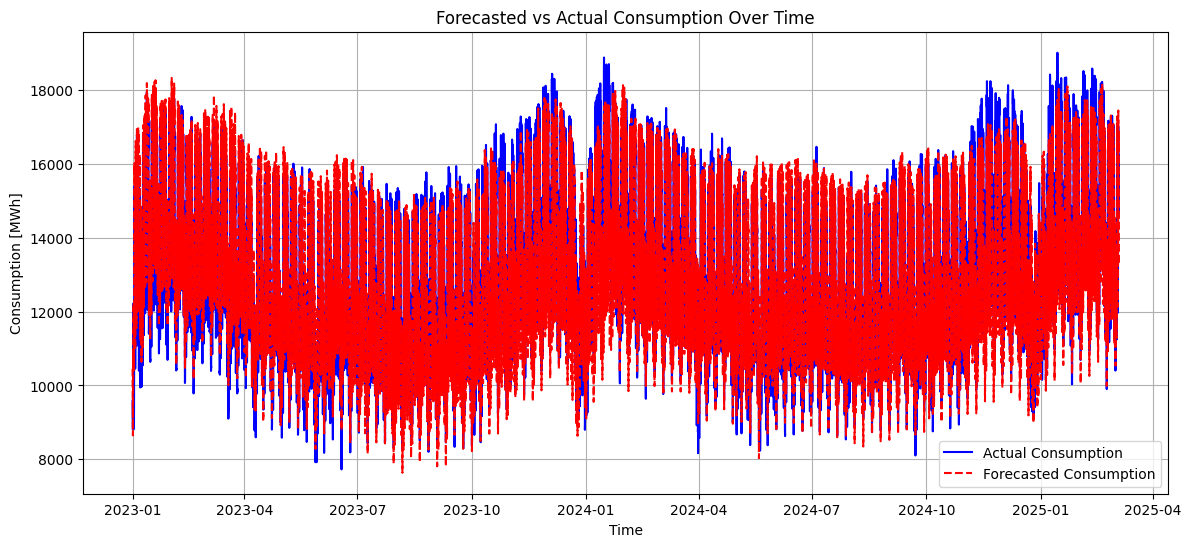

✅ Saved: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA\Forecast_vs_Actual_Consumption.png


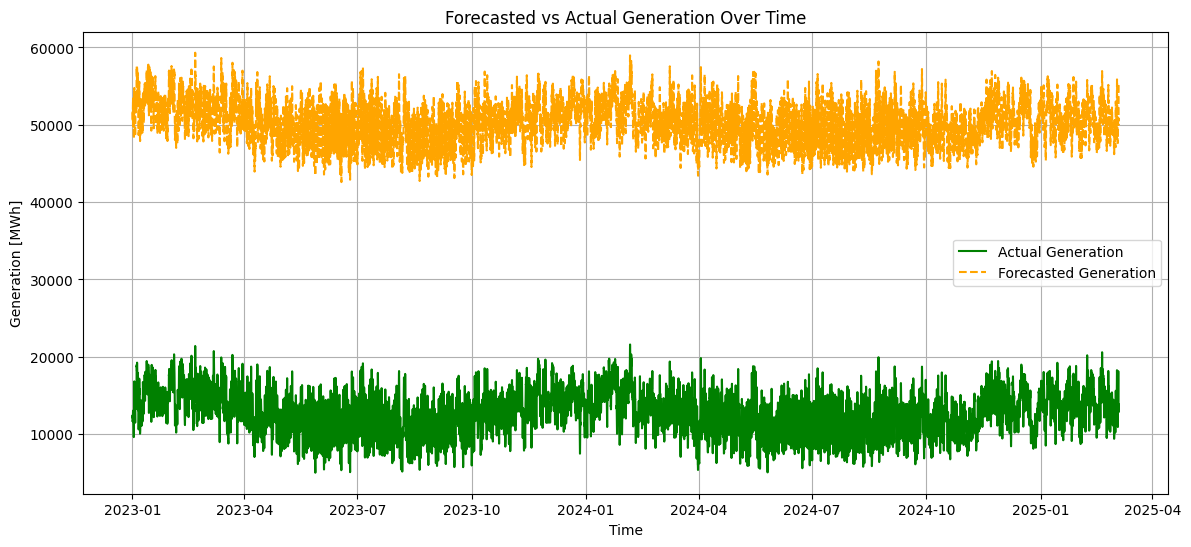

✅ Saved: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA\Forecast_vs_Actual_Generation.png


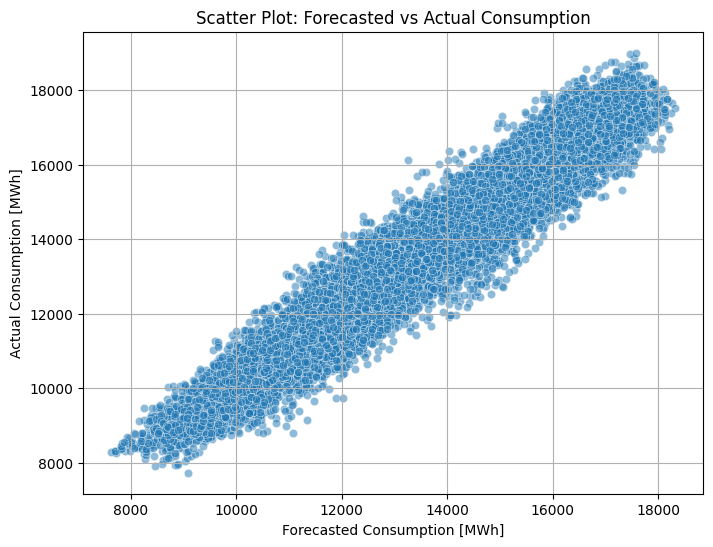

✅ Saved: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA\Scatter_Forecast_vs_Actual_Consumption.png


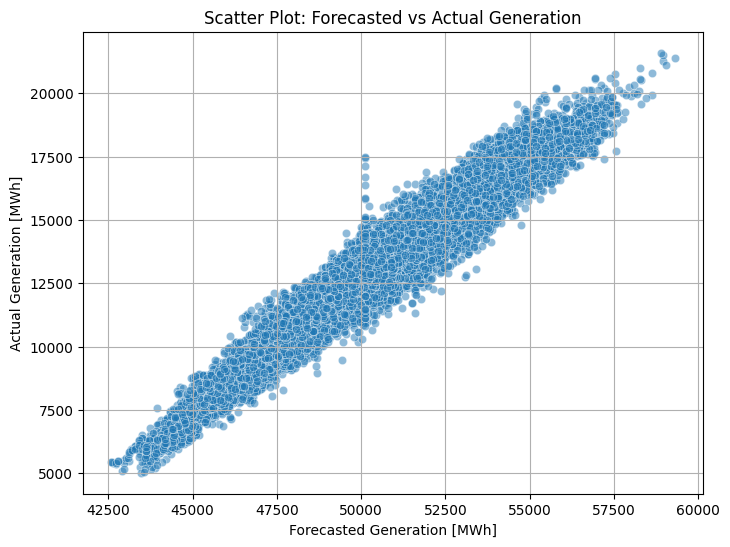

✅ Saved: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA\Scatter_Forecast_vs_Actual_Generation.png


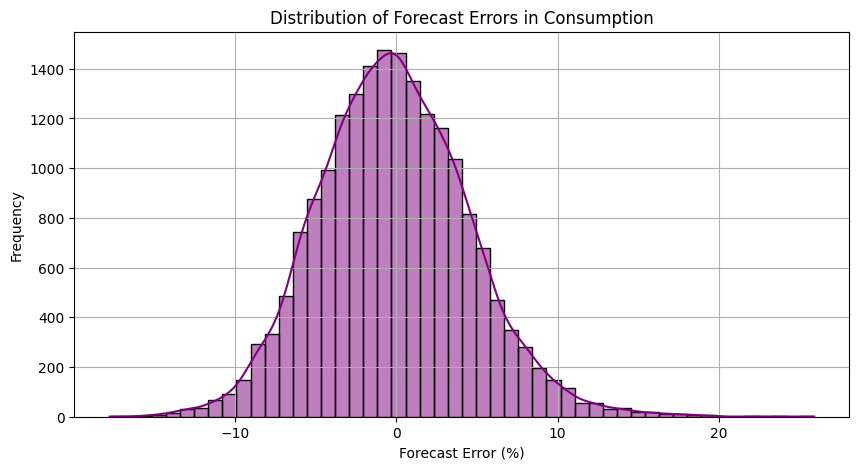

✅ Saved: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA\Distribution_Forecast_Errors_Consumption.png


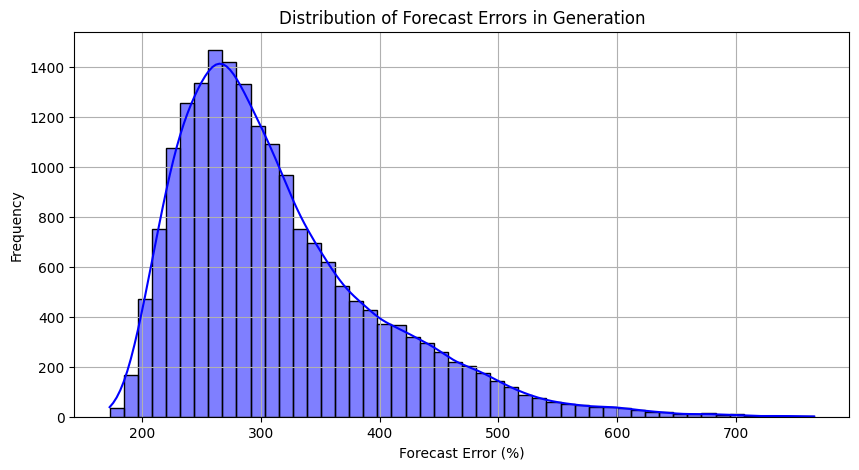

✅ Saved: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA\Distribution_Forecast_Errors_Generation.png


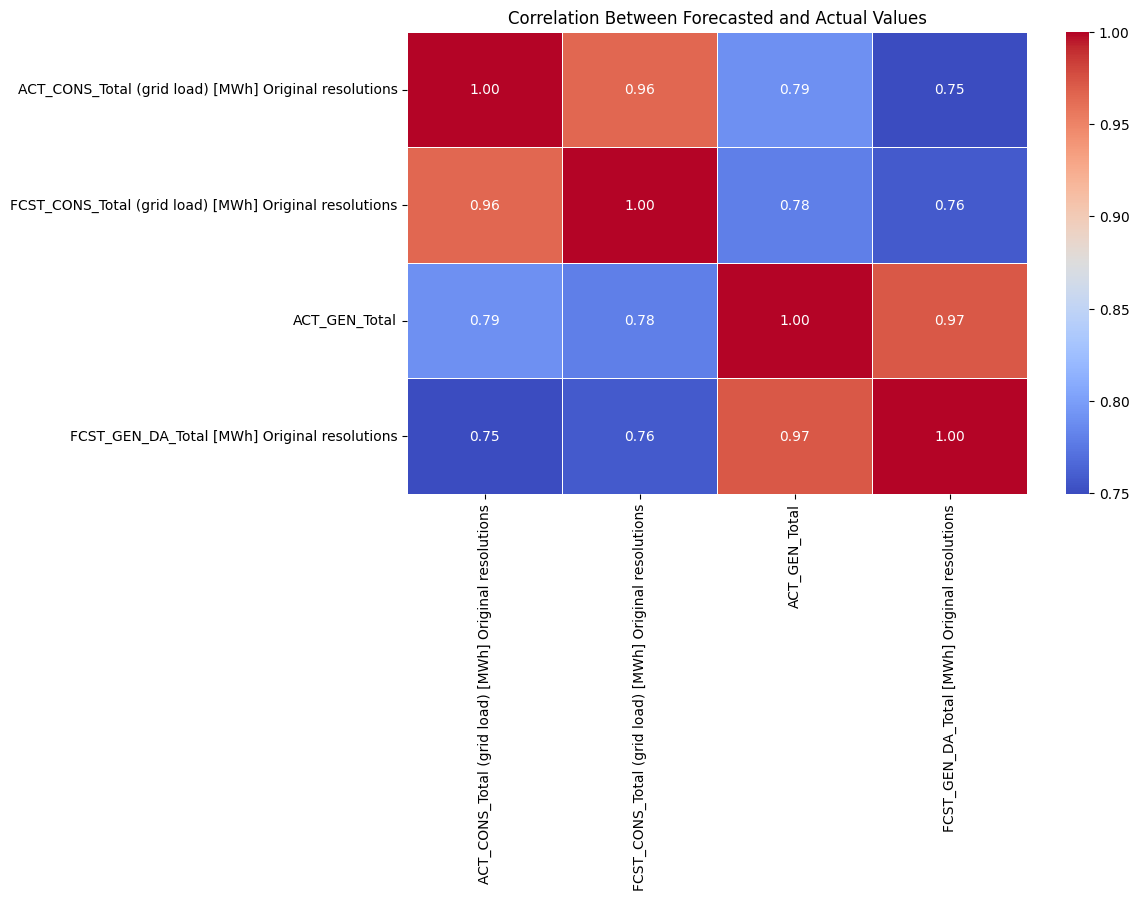

✅ Saved: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA\Correlation_Forecast_vs_Actual.png

✅ Analysis Complete! All graphs are displayed and saved in the EDA folder.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

data_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Quarterhour.csv"
output_dir = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA"
os.makedirs(output_dir, exist_ok=True)  


df = pd.read_csv(data_file, encoding='windows-1252', low_memory=False)

df['Start date'] = pd.to_datetime(df['Start date'], errors='coerce')

df['Hour'] = df['Start date'].dt.floor('h')
df_hourly = df.groupby("Hour").mean(numeric_only=True)

df_hourly["ACT_GEN_Total"] = (
    df_hourly["ACT_GEN_Biomass [MWh] Original resolutions"] +
    df_hourly["ACT_GEN_Hydropower [MWh] Original resolutions"] +
    df_hourly["ACT_GEN_Wind offshore [MWh] Original resolutions"] +
    df_hourly["ACT_GEN_Wind onshore [MWh] Original resolutions"] +
    df_hourly["ACT_GEN_Photovoltaics [MWh] Original resolutions"] +
    df_hourly["ACT_GEN_Other renewable [MWh] Original resolutions"] +
    df_hourly["ACT_GEN_Nuclear [MWh] Original resolutions"] +
    df_hourly["ACT_GEN_Lignite [MWh] Original resolutions"] +
    df_hourly["ACT_GEN_Hard coal [MWh] Original resolutions"] +
    df_hourly["ACT_GEN_Fossil gas [MWh] Original resolutions"] +
    df_hourly["ACT_GEN_Hydro pumped storage [MWh] Original resolutions"] +
    df_hourly["ACT_GEN_Other conventional [MWh] Original resolutions"]
)

df_hourly["Error_Consumption_Total"] = (
    (df_hourly["FCST_CONS_Total (grid load) [MWh] Original resolutions"] - df_hourly["ACT_CONS_Total (grid load) [MWh] Original resolutions"]) /
    df_hourly["ACT_CONS_Total (grid load) [MWh] Original resolutions"]
) * 100

df_hourly["Error_Consumption_Residual"] = (
    (df_hourly["FCST_CONS_Residual load [MWh] Original resolutions"] - df_hourly["ACT_CONS_Residual load [MWh] Original resolutions"]) /
    df_hourly["ACT_CONS_Residual load [MWh] Original resolutions"]
) * 100

df_hourly["Error_Generation_Total"] = (
    (df_hourly["FCST_GEN_DA_Total [MWh] Original resolutions"] - df_hourly["ACT_GEN_Total"]) /
    df_hourly["ACT_GEN_Total"]
) * 100

def save_and_show_plot(fig, filename):
    filepath = os.path.join(output_dir, filename)
    fig.savefig(filepath, dpi=300)
    plt.show()
    print(f"✅ Saved: {filepath}")

fig = plt.figure(figsize=(14, 6))
plt.plot(df_hourly.index, df_hourly["ACT_CONS_Total (grid load) [MWh] Original resolutions"], label="Actual Consumption", color='blue')
plt.plot(df_hourly.index, df_hourly["FCST_CONS_Total (grid load) [MWh] Original resolutions"], label="Forecasted Consumption", linestyle="dashed", color='red')
plt.xlabel("Time")
plt.ylabel("Consumption [MWh]")
plt.title("Forecasted vs Actual Consumption Over Time")
plt.legend()
plt.grid(True)
save_and_show_plot(fig, "Forecast_vs_Actual_Consumption.png")

fig = plt.figure(figsize=(14, 6))
plt.plot(df_hourly.index, df_hourly["ACT_GEN_Total"], label="Actual Generation", color='green')
plt.plot(df_hourly.index, df_hourly["FCST_GEN_DA_Total [MWh] Original resolutions"], label="Forecasted Generation", linestyle="dashed", color='orange')
plt.xlabel("Time")
plt.ylabel("Generation [MWh]")
plt.title("Forecasted vs Actual Generation Over Time")
plt.legend()
plt.grid(True)
save_and_show_plot(fig, "Forecast_vs_Actual_Generation.png")

fig = plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_hourly["FCST_CONS_Total (grid load) [MWh] Original resolutions"], y=df_hourly["ACT_CONS_Total (grid load) [MWh] Original resolutions"], alpha=0.5)
plt.xlabel("Forecasted Consumption [MWh]")
plt.ylabel("Actual Consumption [MWh]")
plt.title("Scatter Plot: Forecasted vs Actual Consumption")
plt.grid(True)
save_and_show_plot(fig, "Scatter_Forecast_vs_Actual_Consumption.png")

fig = plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_hourly["FCST_GEN_DA_Total [MWh] Original resolutions"], y=df_hourly["ACT_GEN_Total"], alpha=0.5)
plt.xlabel("Forecasted Generation [MWh]")
plt.ylabel("Actual Generation [MWh]")
plt.title("Scatter Plot: Forecasted vs Actual Generation")
plt.grid(True)
save_and_show_plot(fig, "Scatter_Forecast_vs_Actual_Generation.png")

fig = plt.figure(figsize=(10, 5))
sns.histplot(df_hourly["Error_Consumption_Total"], bins=50, kde=True, color="purple")
plt.xlabel("Forecast Error (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Forecast Errors in Consumption")
plt.grid(True)
save_and_show_plot(fig, "Distribution_Forecast_Errors_Consumption.png")

fig = plt.figure(figsize=(10, 5))
sns.histplot(df_hourly["Error_Generation_Total"], bins=50, kde=True, color="blue")
plt.xlabel("Forecast Error (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Forecast Errors in Generation")
plt.grid(True)
save_and_show_plot(fig, "Distribution_Forecast_Errors_Generation.png")

correlation = df_hourly[[
    "ACT_CONS_Total (grid load) [MWh] Original resolutions",
    "FCST_CONS_Total (grid load) [MWh] Original resolutions",
    "ACT_GEN_Total",
    "FCST_GEN_DA_Total [MWh] Original resolutions"
]].corr()

fig = plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Forecasted and Actual Values")
save_and_show_plot(fig, "Correlation_Forecast_vs_Actual.png")

print("\n✅ Analysis Complete! All graphs are displayed and saved in the EDA folder.")

# 8. How do balancing reserves and TSO costs impact electricity prices?

C:\Users\User\AppData\Local\Temp\ipykernel_50140\1277759635.py:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method="ffill", inplace=True)


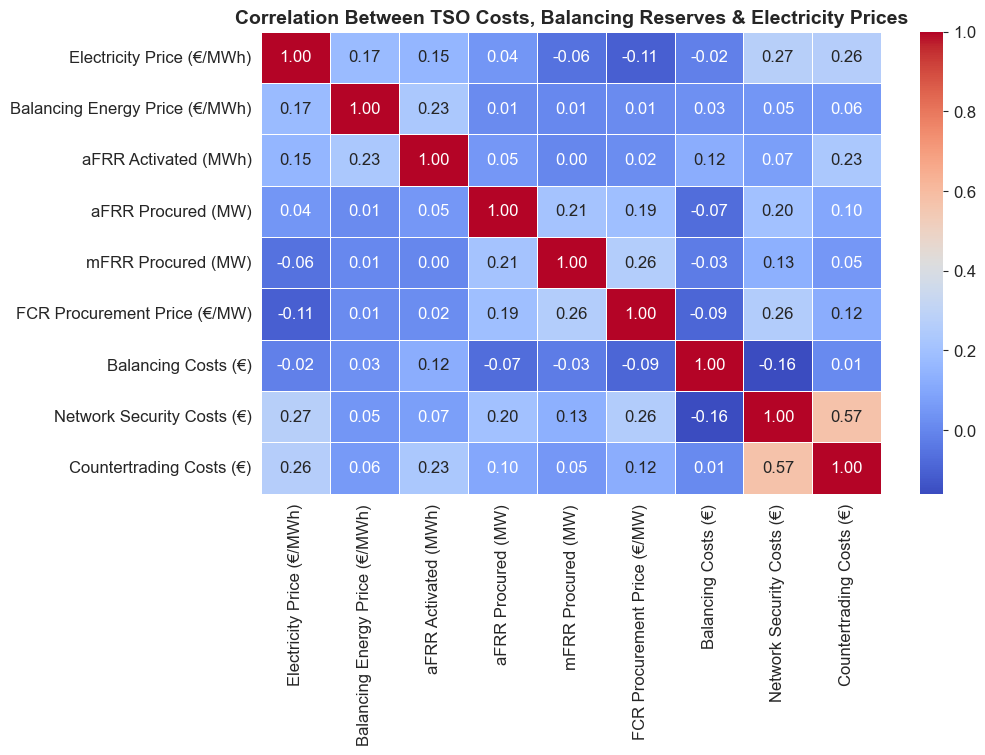

✅ Saved: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA\Correlation_TSO_vs_Prices.png


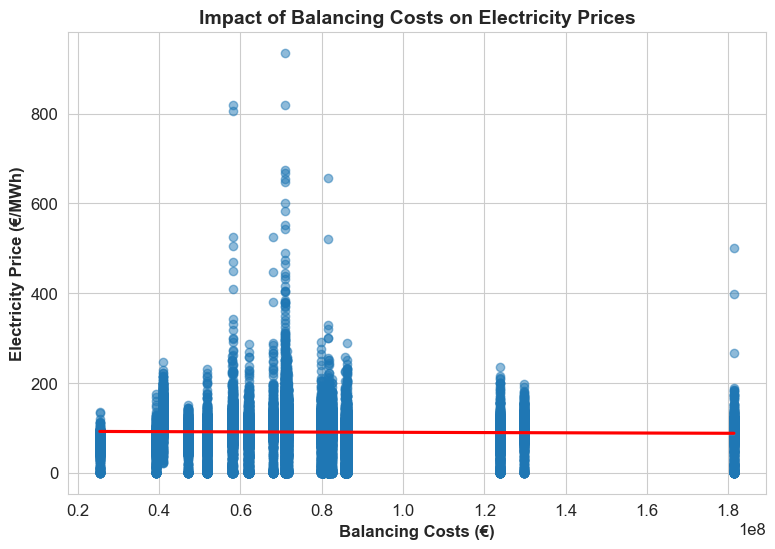

✅ Saved: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA\Balancing_Costs_vs_Prices.png


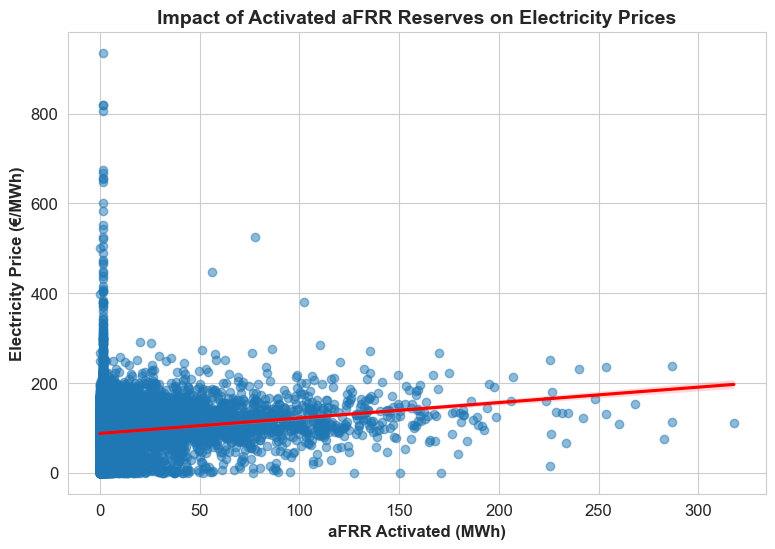

✅ Saved: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA\aFRR_vs_Prices.png


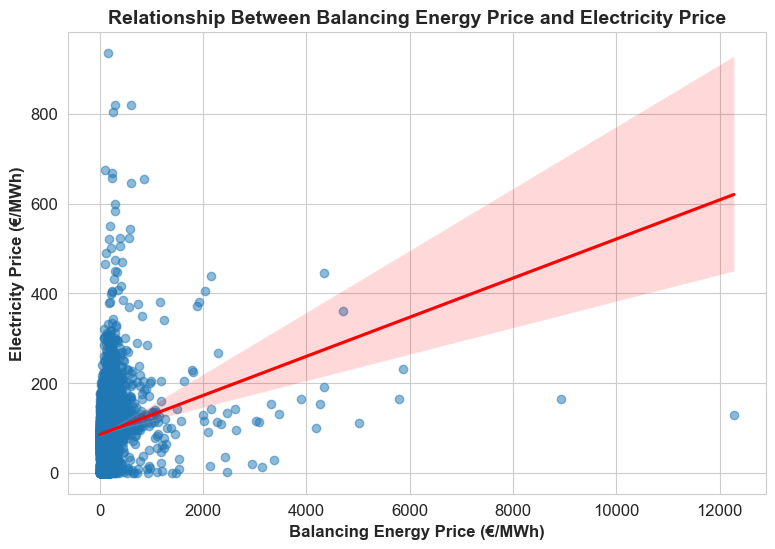

✅ Saved: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA\Balancing_Price_vs_Prices.png


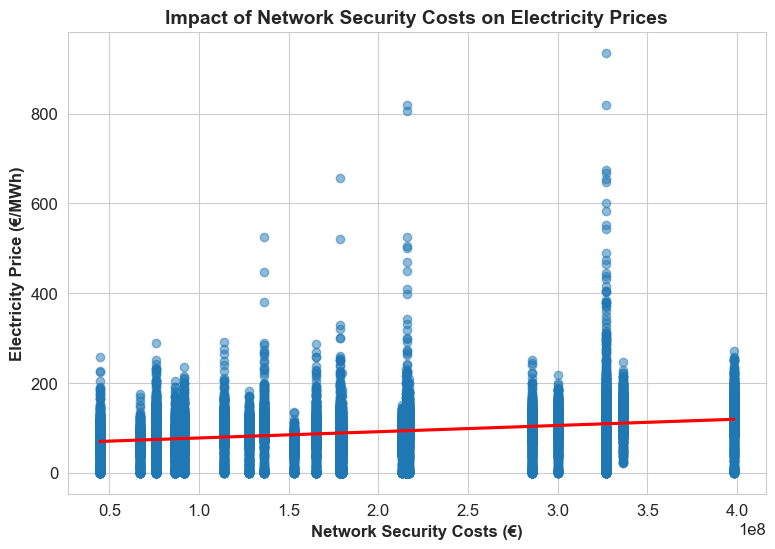

✅ Saved: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA\Network_Security_vs_Prices.png

✅ Analysis Completed! All professional graphs are saved in: C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

path_prices = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Day-ahead_prices_202301010000_202503050000_Hour.csv"
path_tso_costs = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Costs_of_TSOs__without_costs_of_DSOs__202301010000_202503050000_Month.csv"
path_balancing = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Quarterhour.csv"

output_dir = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\EDA"
os.makedirs(output_dir, exist_ok=True)

df_prices = pd.read_csv(path_prices, encoding="windows-1252", low_memory=False)
df_tso = pd.read_csv(path_tso_costs, encoding="windows-1252", low_memory=False)
df_balancing = pd.read_csv(path_balancing, encoding="windows-1252", low_memory=False)

for df in [df_prices, df_tso, df_balancing]:
    df["Start date"] = pd.to_datetime(df["Start date"], errors="coerce")  
    df.dropna(subset=["Start date"], inplace=True)  

numeric_cols = df_balancing.select_dtypes(include=['number']).columns
df_balancing[numeric_cols] = df_balancing[numeric_cols].apply(pd.to_numeric, errors="coerce")

df_balancing_hourly = df_balancing.set_index("Start date").resample("h")[numeric_cols].mean()

df_merged = df_prices.merge(df_balancing_hourly, on="Start date", how="inner")
df_merged = df_merged.merge(df_tso, on="Start date", how="left")  
df_merged.fillna(method="ffill", inplace=True)  

df_final = df_merged[
    ["Start date", 
     "Germany/Luxembourg [€/MWh] Original resolutions", 
     "BAL_ENERGY_Price [€/MWh] Original resolutions",
     "RES_AFRR_Volume activated (+) [MWh] Original resolutions",
     "RES_AFRR_Volume procured (+) [MW] Original resolutions",
     "RES_MFRR_Volume procured (+) [MW] Original resolutions",
     "RES_FCR_Procurement price [€/MW] Original resolutions",
     "Balancing services [€] Original resolutions",
     "Network security of the TSOs [€] Original resolutions",
     "Countertrading [€] Original resolutions"]
]

df_final.columns = [
    "Date", "Electricity Price (€/MWh)", "Balancing Energy Price (€/MWh)",
    "aFRR Activated (MWh)", "aFRR Procured (MW)", "mFRR Procured (MW)",
    "FCR Procurement Price (€/MW)", "Balancing Costs (€)",
    "Network Security Costs (€)", "Countertrading Costs (€)"
]

df_corr = df_final.drop(columns=["Date"])

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12, 'axes.labelweight': 'bold', 'axes.titleweight': 'bold'})

def save_and_show_plot(fig, filename):
    filepath = os.path.join(output_dir, filename)
    fig.savefig(filepath, dpi=300, bbox_inches="tight")
    plt.show()
    print(f"✅ Saved: {filepath}")

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax)
ax.set_title("Correlation Between TSO Costs, Balancing Reserves & Electricity Prices", fontsize=14)
save_and_show_plot(fig, "Correlation_TSO_vs_Prices.png")

fig, ax = plt.subplots(figsize=(9, 6))
sns.regplot(data=df_final, x="Balancing Costs (€)", y="Electricity Price (€/MWh)", scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=ax)
ax.set_title("Impact of Balancing Costs on Electricity Prices", fontsize=14)
save_and_show_plot(fig, "Balancing_Costs_vs_Prices.png")

fig, ax = plt.subplots(figsize=(9, 6))
sns.regplot(data=df_final, x="aFRR Activated (MWh)", y="Electricity Price (€/MWh)", scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=ax)
ax.set_title("Impact of Activated aFRR Reserves on Electricity Prices", fontsize=14)
save_and_show_plot(fig, "aFRR_vs_Prices.png")

fig, ax = plt.subplots(figsize=(9, 6))
sns.regplot(data=df_final, x="Balancing Energy Price (€/MWh)", y="Electricity Price (€/MWh)", scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=ax)
ax.set_title("Relationship Between Balancing Energy Price and Electricity Price", fontsize=14)
save_and_show_plot(fig, "Balancing_Price_vs_Prices.png")

fig, ax = plt.subplots(figsize=(9, 6))
sns.regplot(data=df_final, x="Network Security Costs (€)", y="Electricity Price (€/MWh)", scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, ax=ax)
ax.set_title("Impact of Network Security Costs on Electricity Prices", fontsize=14)
save_and_show_plot(fig, "Network_Security_vs_Prices.png")

print("\n✅ Analysis Completed! All professional graphs are saved in:", output_dir)


# 9. How do scheduled commercial exchanges influence price fluctuations?


C:\Users\User\AppData\Local\Temp\ipykernel_192628\937548620.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = quarterhour_df.resample('H', on='Start date').mean().reset_index()


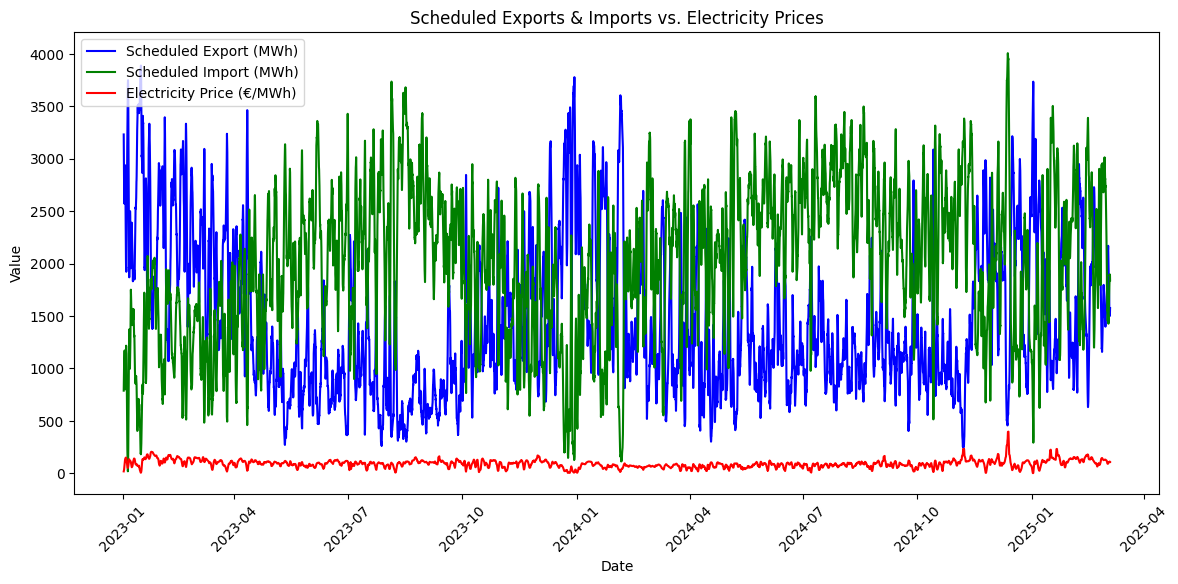

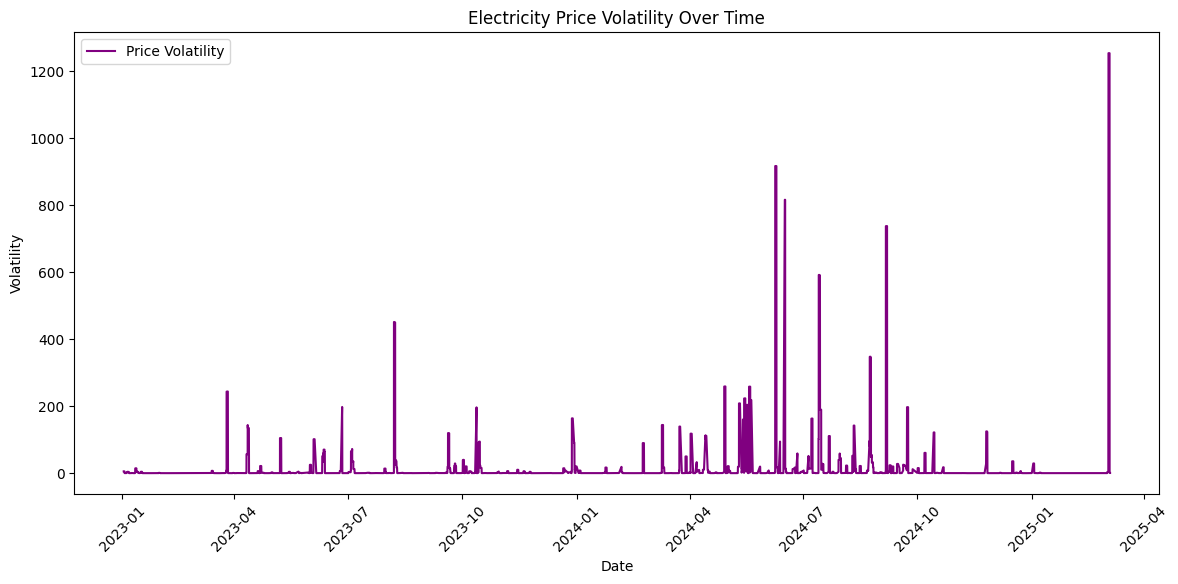

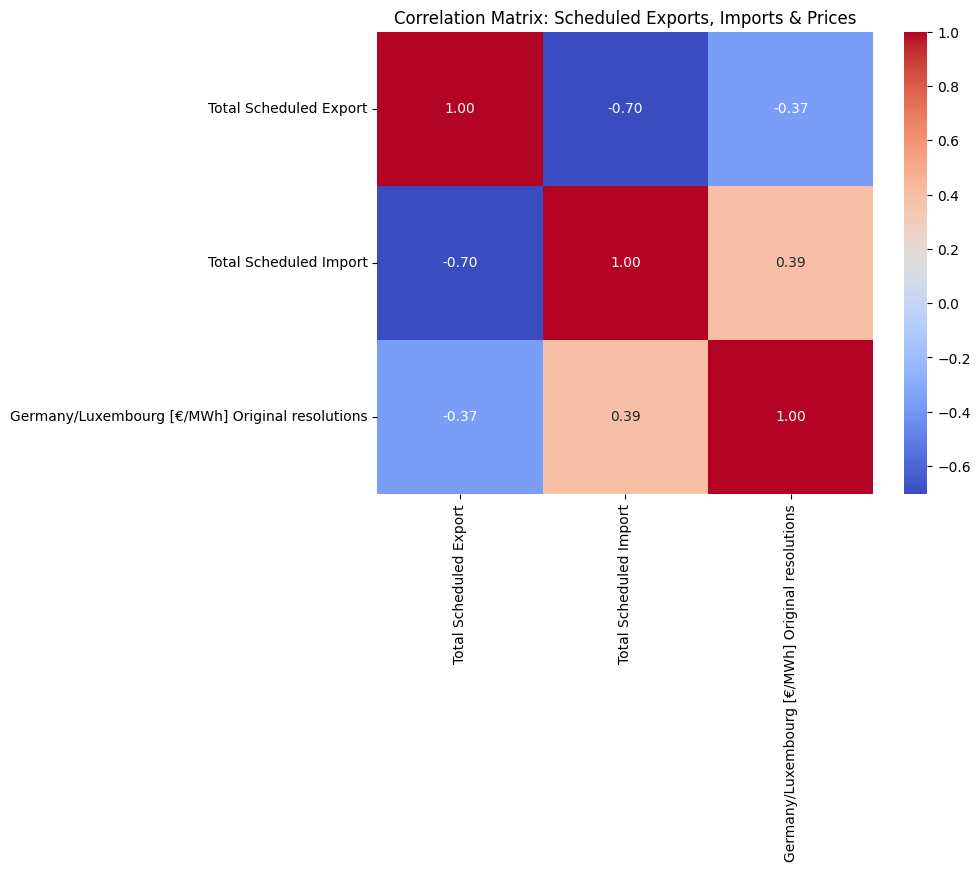

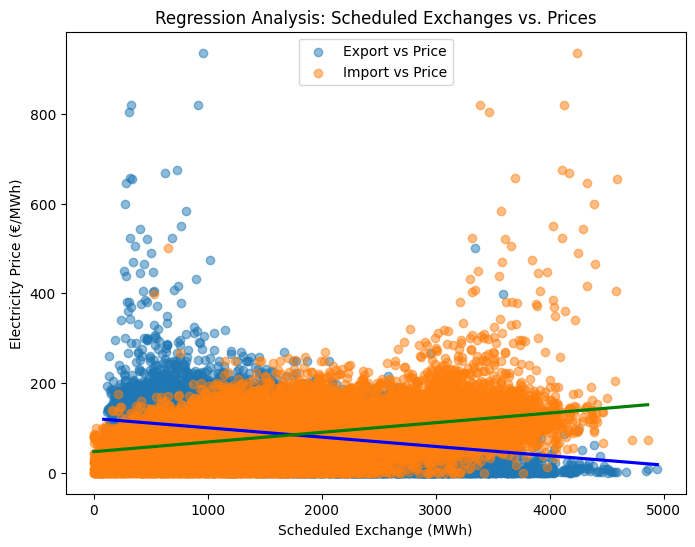

Analysis complete. Graphs and summary saved in EDA folder.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
from scipy.stats import pearsonr

quarterhour_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Quarterhour.csv"
day_ahead_prices_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Day-ahead_prices_202301010000_202503050000_Hour.csv"
save_path = r"C:/Users/User/Desktop/The Electricity Price Forecasting Challenge/EDA"

os.makedirs(save_path, exist_ok=True)

quarterhour_df = pd.read_csv(quarterhour_file, parse_dates=['Start date', 'End date'], encoding='windows-1252')
day_ahead_prices_df = pd.read_csv(day_ahead_prices_file, parse_dates=['Start date', 'End date'], encoding='windows-1252')

df_resampled = quarterhour_df.resample('H', on='Start date').mean().reset_index()

merged_df = pd.merge(df_resampled, day_ahead_prices_df, on=['Start date'], how='inner')

scheduled_exports_cols = [col for col in merged_df.columns if '(export)' in col and 'CB_SCHED_' in col]
scheduled_imports_cols = [col for col in merged_df.columns if '(import)' in col and 'CB_SCHED_' in col]
price_col = 'Germany/Luxembourg [€/MWh] Original resolutions'

merged_df['Total Scheduled Export'] = merged_df[scheduled_exports_cols].sum(axis=1)
merged_df['Total Scheduled Import'] = merged_df[scheduled_imports_cols].sum(axis=1)

merged_df['Total Scheduled Export Smoothed'] = merged_df['Total Scheduled Export'].rolling(window=24).mean()
merged_df['Total Scheduled Import Smoothed'] = merged_df['Total Scheduled Import'].rolling(window=24).mean()
merged_df['Price Rolling Mean'] = merged_df[price_col].rolling(window=24).mean()

plt.figure(figsize=(14, 6))
sns.lineplot(x=merged_df['Start date'], y=merged_df['Total Scheduled Export Smoothed'], label='Scheduled Export (MWh)', color='blue')
sns.lineplot(x=merged_df['Start date'], y=merged_df['Total Scheduled Import Smoothed'], label='Scheduled Import (MWh)', color='green')
sns.lineplot(x=merged_df['Start date'], y=merged_df['Price Rolling Mean'], label='Electricity Price (€/MWh)', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scheduled Exports & Imports vs. Electricity Prices')
plt.legend()
plt.xticks(rotation=45)
plt.savefig(f"{save_path}/Scheduled_Exports_Imports_vs_Prices.png", dpi=300, bbox_inches='tight')
plt.show()

merged_df['Price Volatility'] = merged_df[price_col].pct_change().rolling(window=24).std()
plt.figure(figsize=(14, 6))
sns.lineplot(x=merged_df['Start date'], y=merged_df['Price Volatility'], label='Price Volatility', color='purple')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Electricity Price Volatility Over Time')
plt.xticks(rotation=45)
plt.savefig(f"{save_path}/Price_Volatility.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(merged_df[['Total Scheduled Export', 'Total Scheduled Import', price_col]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Scheduled Exports, Imports & Prices')
plt.savefig(f"{save_path}/Correlation_Matrix.png", dpi=300, bbox_inches='tight')
plt.show()

X = merged_df[['Total Scheduled Export', 'Total Scheduled Import']].dropna()
y = merged_df[price_col].dropna().loc[X.index]
X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()

with open(f"{save_path}/Regression_Summary.txt", "w") as f:
    f.write(model.summary().as_text())

plt.figure(figsize=(8, 6))
sns.regplot(x=merged_df['Total Scheduled Export'], y=merged_df[price_col], label='Export vs Price', scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
sns.regplot(x=merged_df['Total Scheduled Import'], y=merged_df[price_col], label='Import vs Price', scatter_kws={'alpha':0.5}, line_kws={'color':'green'})
plt.xlabel('Scheduled Exchange (MWh)')
plt.ylabel('Electricity Price (€/MWh)')
plt.title('Regression Analysis: Scheduled Exchanges vs. Prices')
plt.legend()
plt.savefig(f"{save_path}/Regression_Analysis.png", dpi=300, bbox_inches='tight')
plt.show()

print("Analysis complete. Graphs and summary saved in EDA folder.")


# 10. What is the impact of cross-border physical flows on electricity prices?

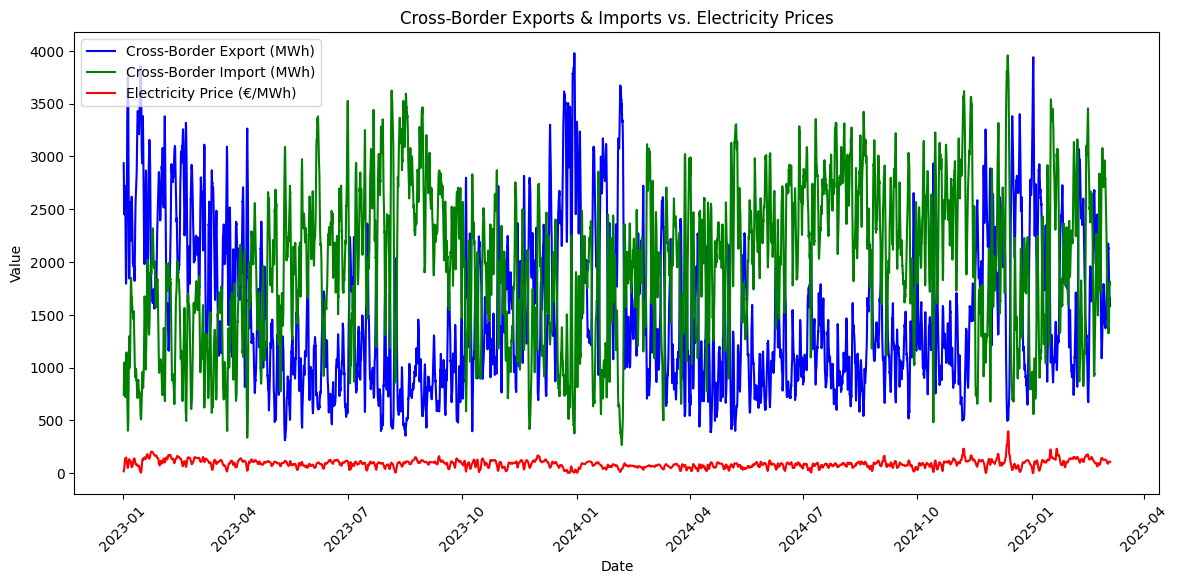

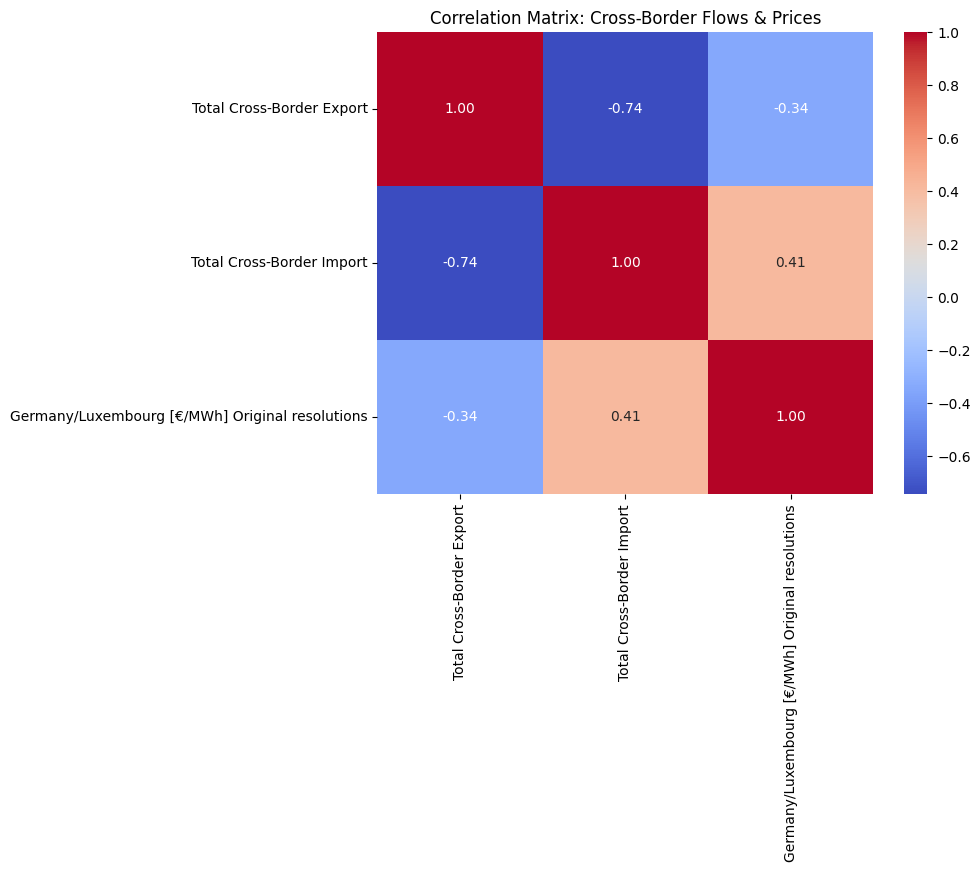

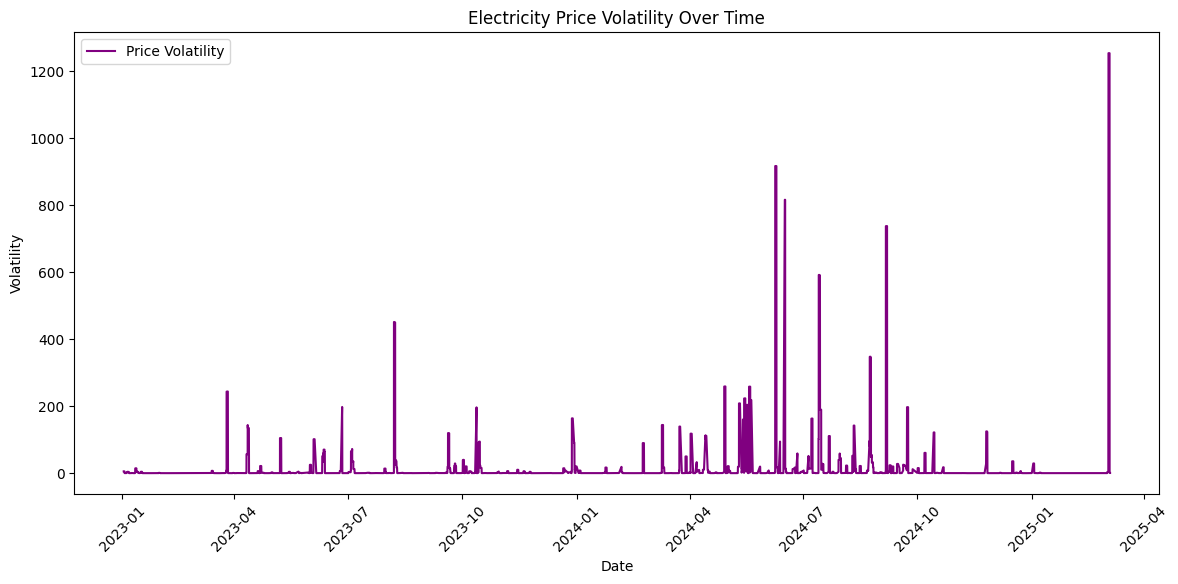

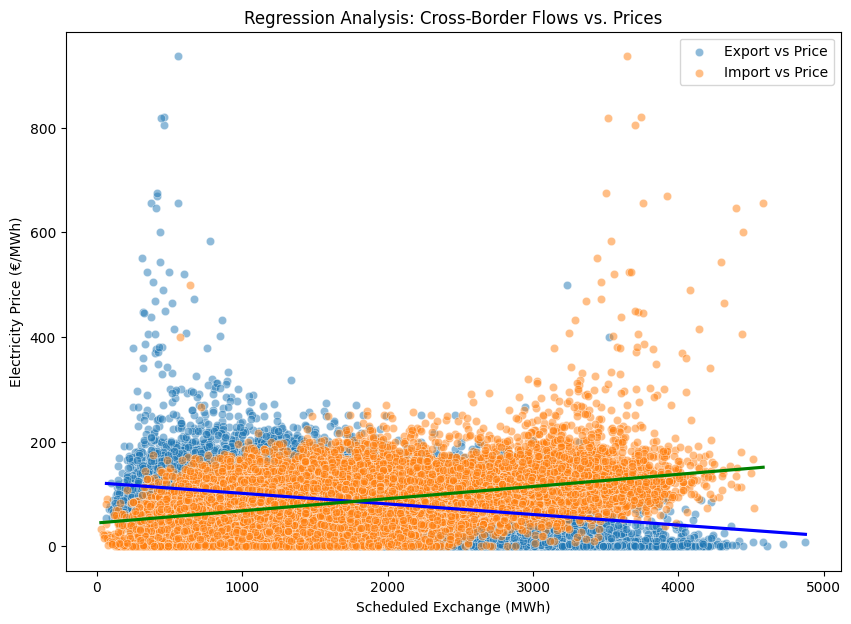

Analysis complete. Graphs and results saved in EDA folder.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
from scipy.stats import pearsonr

quarterhour_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\merged_Quarterhour.csv"
day_ahead_prices_file = r"C:\Users\User\Desktop\The Electricity Price Forecasting Challenge\workfiles\cleaned_Day-ahead_prices_202301010000_202503050000_Hour.csv"
save_path = r"C:/Users/User/Desktop/The Electricity Price Forecasting Challenge/EDA"

os.makedirs(save_path, exist_ok=True)

quarterhour_df = pd.read_csv(quarterhour_file, parse_dates=['Start date', 'End date'], encoding='windows-1252')
day_ahead_prices_df = pd.read_csv(day_ahead_prices_file, parse_dates=['Start date', 'End date'], encoding='windows-1252')

df_resampled = quarterhour_df.resample('h', on='Start date').mean().reset_index()

merged_df = pd.merge(df_resampled, day_ahead_prices_df, on=['Start date'], how='inner')

cross_border_exports_cols = [col for col in merged_df.columns if '(export)' in col and 'CB_FLOW_' in col]
cross_border_imports_cols = [col for col in merged_df.columns if '(import)' in col and 'CB_FLOW_' in col]
price_col = 'Germany/Luxembourg [€/MWh] Original resolutions'

merged_df['Total Cross-Border Export'] = merged_df[cross_border_exports_cols].sum(axis=1)
merged_df['Total Cross-Border Import'] = merged_df[cross_border_imports_cols].sum(axis=1)

merged_df['Export Smoothed'] = merged_df['Total Cross-Border Export'].rolling(window=24).mean()
merged_df['Import Smoothed'] = merged_df['Total Cross-Border Import'].rolling(window=24).mean()
merged_df['Price Rolling Mean'] = merged_df[price_col].rolling(window=24).mean()

plt.figure(figsize=(14, 6))
sns.lineplot(x=merged_df['Start date'], y=merged_df['Export Smoothed'], label='Cross-Border Export (MWh)', color='blue')
sns.lineplot(x=merged_df['Start date'], y=merged_df['Import Smoothed'], label='Cross-Border Import (MWh)', color='green')
sns.lineplot(x=merged_df['Start date'], y=merged_df['Price Rolling Mean'], label='Electricity Price (€/MWh)', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Cross-Border Exports & Imports vs. Electricity Prices')
plt.legend()
plt.xticks(rotation=45)
plt.savefig(f"{save_path}/Cross_Border_Flows_vs_Prices.png", dpi=300, bbox_inches='tight')
plt.show()

correlations = {}
for col in ['Total Cross-Border Export', 'Total Cross-Border Import']:
    valid_data = merged_df[[col, price_col]].dropna()
    if len(valid_data) > 2:
        corr, p_value = pearsonr(valid_data[col], valid_data[price_col])
        correlations[col] = (corr, p_value)

correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation', 'P-Value'])
correlation_df.to_csv(f"{save_path}/Cross_Border_Correlation.csv")

plt.figure(figsize=(8, 6))
sns.heatmap(merged_df[['Total Cross-Border Export', 'Total Cross-Border Import', price_col]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Cross-Border Flows & Prices')
plt.savefig(f"{save_path}/Cross_Border_Correlation_Heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

merged_df['Price Volatility'] = merged_df[price_col].pct_change().rolling(window=24).std()
plt.figure(figsize=(14, 6))
sns.lineplot(x=merged_df['Start date'], y=merged_df['Price Volatility'], label='Price Volatility', color='purple')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Electricity Price Volatility Over Time')
plt.xticks(rotation=45)
plt.savefig(f"{save_path}/Price_Volatility_Cross_Border.png", dpi=300, bbox_inches='tight')
plt.show()

X = merged_df[['Total Cross-Border Export', 'Total Cross-Border Import']].dropna()
y = merged_df[price_col].dropna().loc[X.index]
X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()

with open(f"{save_path}/Regression_Summary_Cross_Border.txt", "w") as f:
    f.write(model.summary().as_text())

plt.figure(figsize=(10, 7))
sns.scatterplot(x=merged_df['Total Cross-Border Export'], y=merged_df[price_col], alpha=0.5, label="Export vs Price")
sns.scatterplot(x=merged_df['Total Cross-Border Import'], y=merged_df[price_col], alpha=0.5, label="Import vs Price")
sns.regplot(x=merged_df['Total Cross-Border Export'], y=merged_df[price_col], scatter=False, color='blue')
sns.regplot(x=merged_df['Total Cross-Border Import'], y=merged_df[price_col], scatter=False, color='green')
plt.xlabel("Scheduled Exchange (MWh)")
plt.ylabel("Electricity Price (€/MWh)")
plt.title("Regression Analysis: Cross-Border Flows vs. Prices")
plt.legend()
plt.savefig(f"{save_path}/Regression_Cross_Border_Flows.png", dpi=300, bbox_inches='tight')
plt.show()

print("Analysis complete. Graphs and results saved in EDA folder.")
